In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head(10)

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
5,89.647973,2.499600
6,69.492733,2.385000
7,20.150520,2.500673
8,82.256337,2.700880
9,64.424802,2.220781


In [4]:
df.corr()

,Rebound Signal Strength nHz,Rock Density kg/m3
Rebound Signal Strength nHz,1.0000,-0.0306
Rock Density kg/m3,-0.0306,1.0000


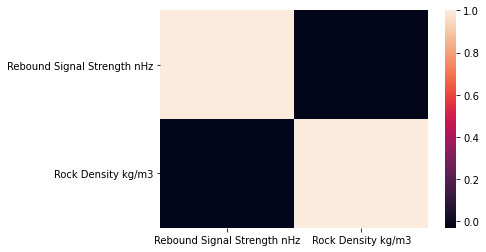

In [5]:
sns.heatmap(df.corr())

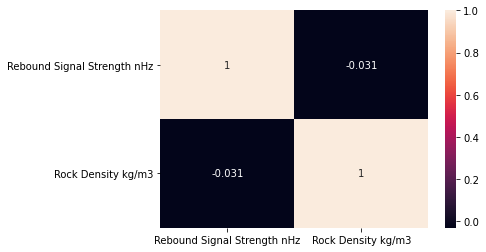

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.describe()

,Rebound Signal Strength nHz,Rock Density kg/m3
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


In [8]:
df.shape

(300, 2)

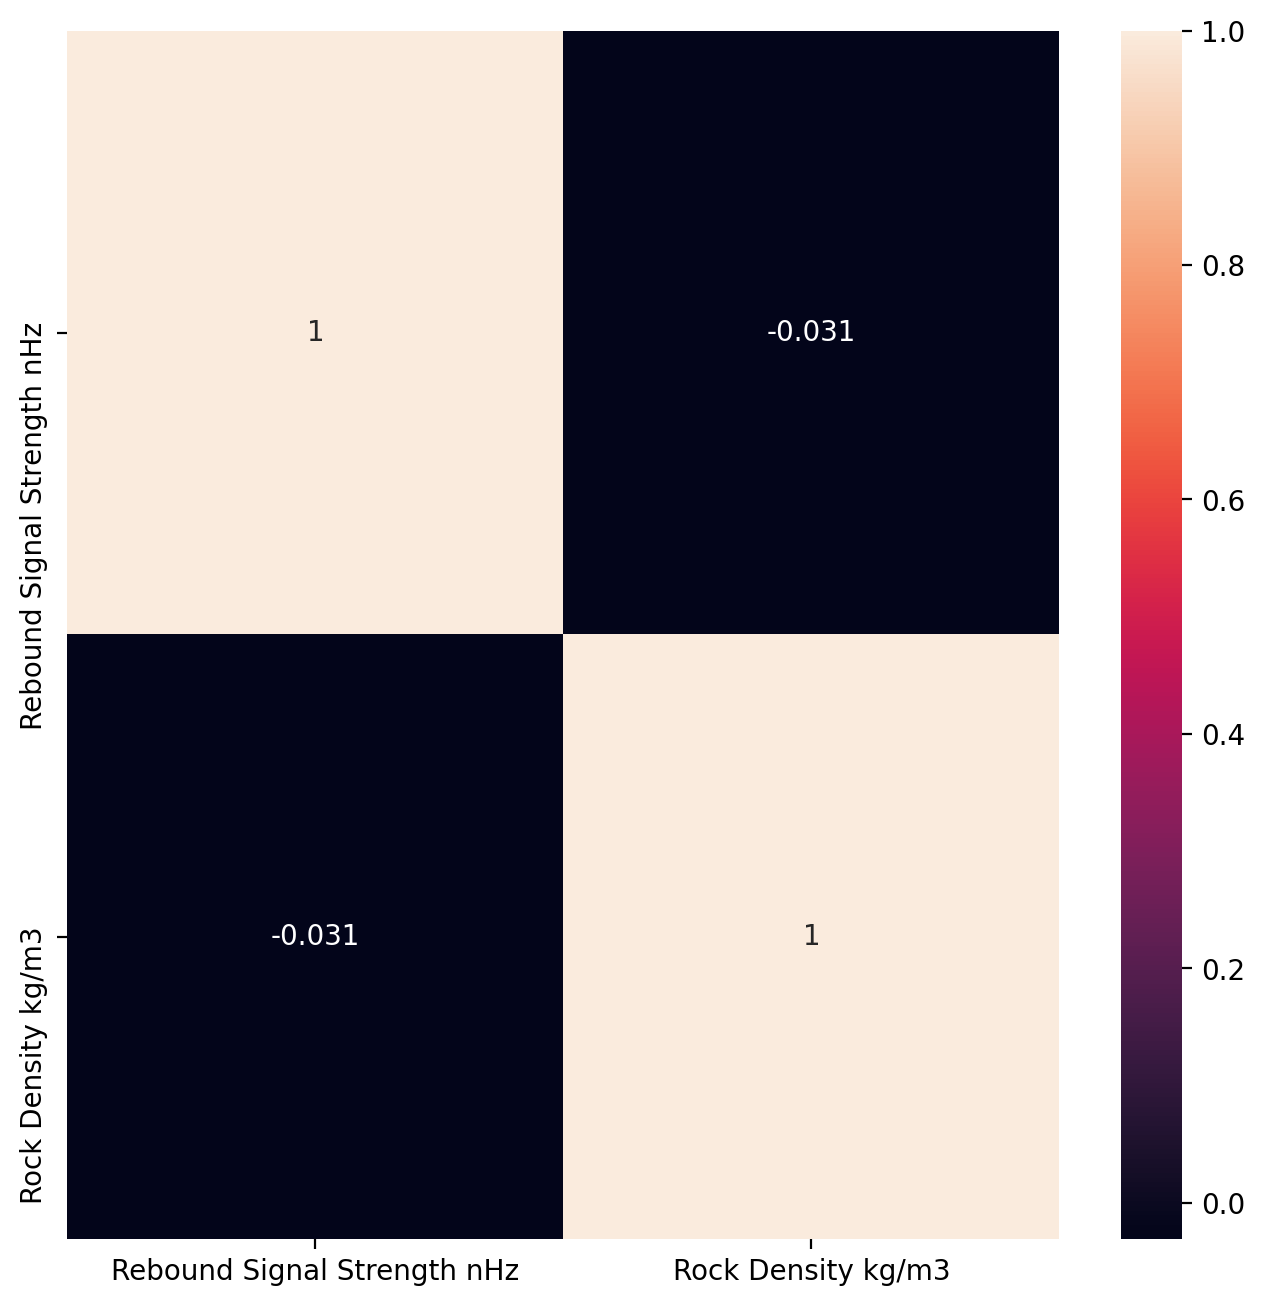

In [9]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [10]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

In [11]:
df.columns = ['signal','density']    #change column name 

In [12]:
df

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


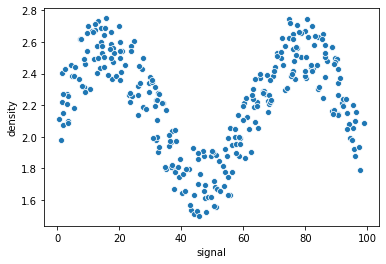

In [13]:
sns.scatterplot(x='signal', y='density',data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   signal   300 non-null    float64
 1   density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [15]:
X = df['signal']
X

0      72.945124
1      14.229877
2      36.597334
3       9.578899
4      21.765897
         ...    
295     0.700227
296    58.586585
297    54.674548
298    15.162434
299    38.020267
Name: signal, Length: 300, dtype: float64

In [16]:
X.head()

0    72.945124
1    14.229877
2    36.597334
3     9.578899
4    21.765897
Name: signal, dtype: float64

In [17]:
type(X)

pandas.core.series.Series

In [18]:
X = df['signal'].values.reshape(-1,1)

In [19]:
y = df ['density']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
LR_model = LinearRegression()

In [24]:
LR_model.fit(X_train,y_train)

LinearRegression()

In [25]:
LR_preds = LR_model.predict(X_test)

In [26]:
LR_preds    ## y_hat

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [27]:
y_test   ## actual y

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
281    1.789537
226    2.263986
284    2.148269
147    2.496735
228    2.442191
235    1.897325
123    1.923440
221    2.266713
270    2.192791
78     2.415050
89     2.661302
4      2.452374
143    2.656490
19     2.343174
259    2.360571
200    2.261214
41     2.038879
208    2.543720
15     2.545491
153    2.300750
285    2.359919
169    1.999187
265    1.658609
13     2.431704
212    2.300320
Name: density, dtype: float64

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mean_absolute_error(y_test,LR_preds)    #MAE

0.211198973318633

In [30]:
np.sqrt(mean_squared_error(y_test,LR_preds))   #RMSE

0.25700519965846297

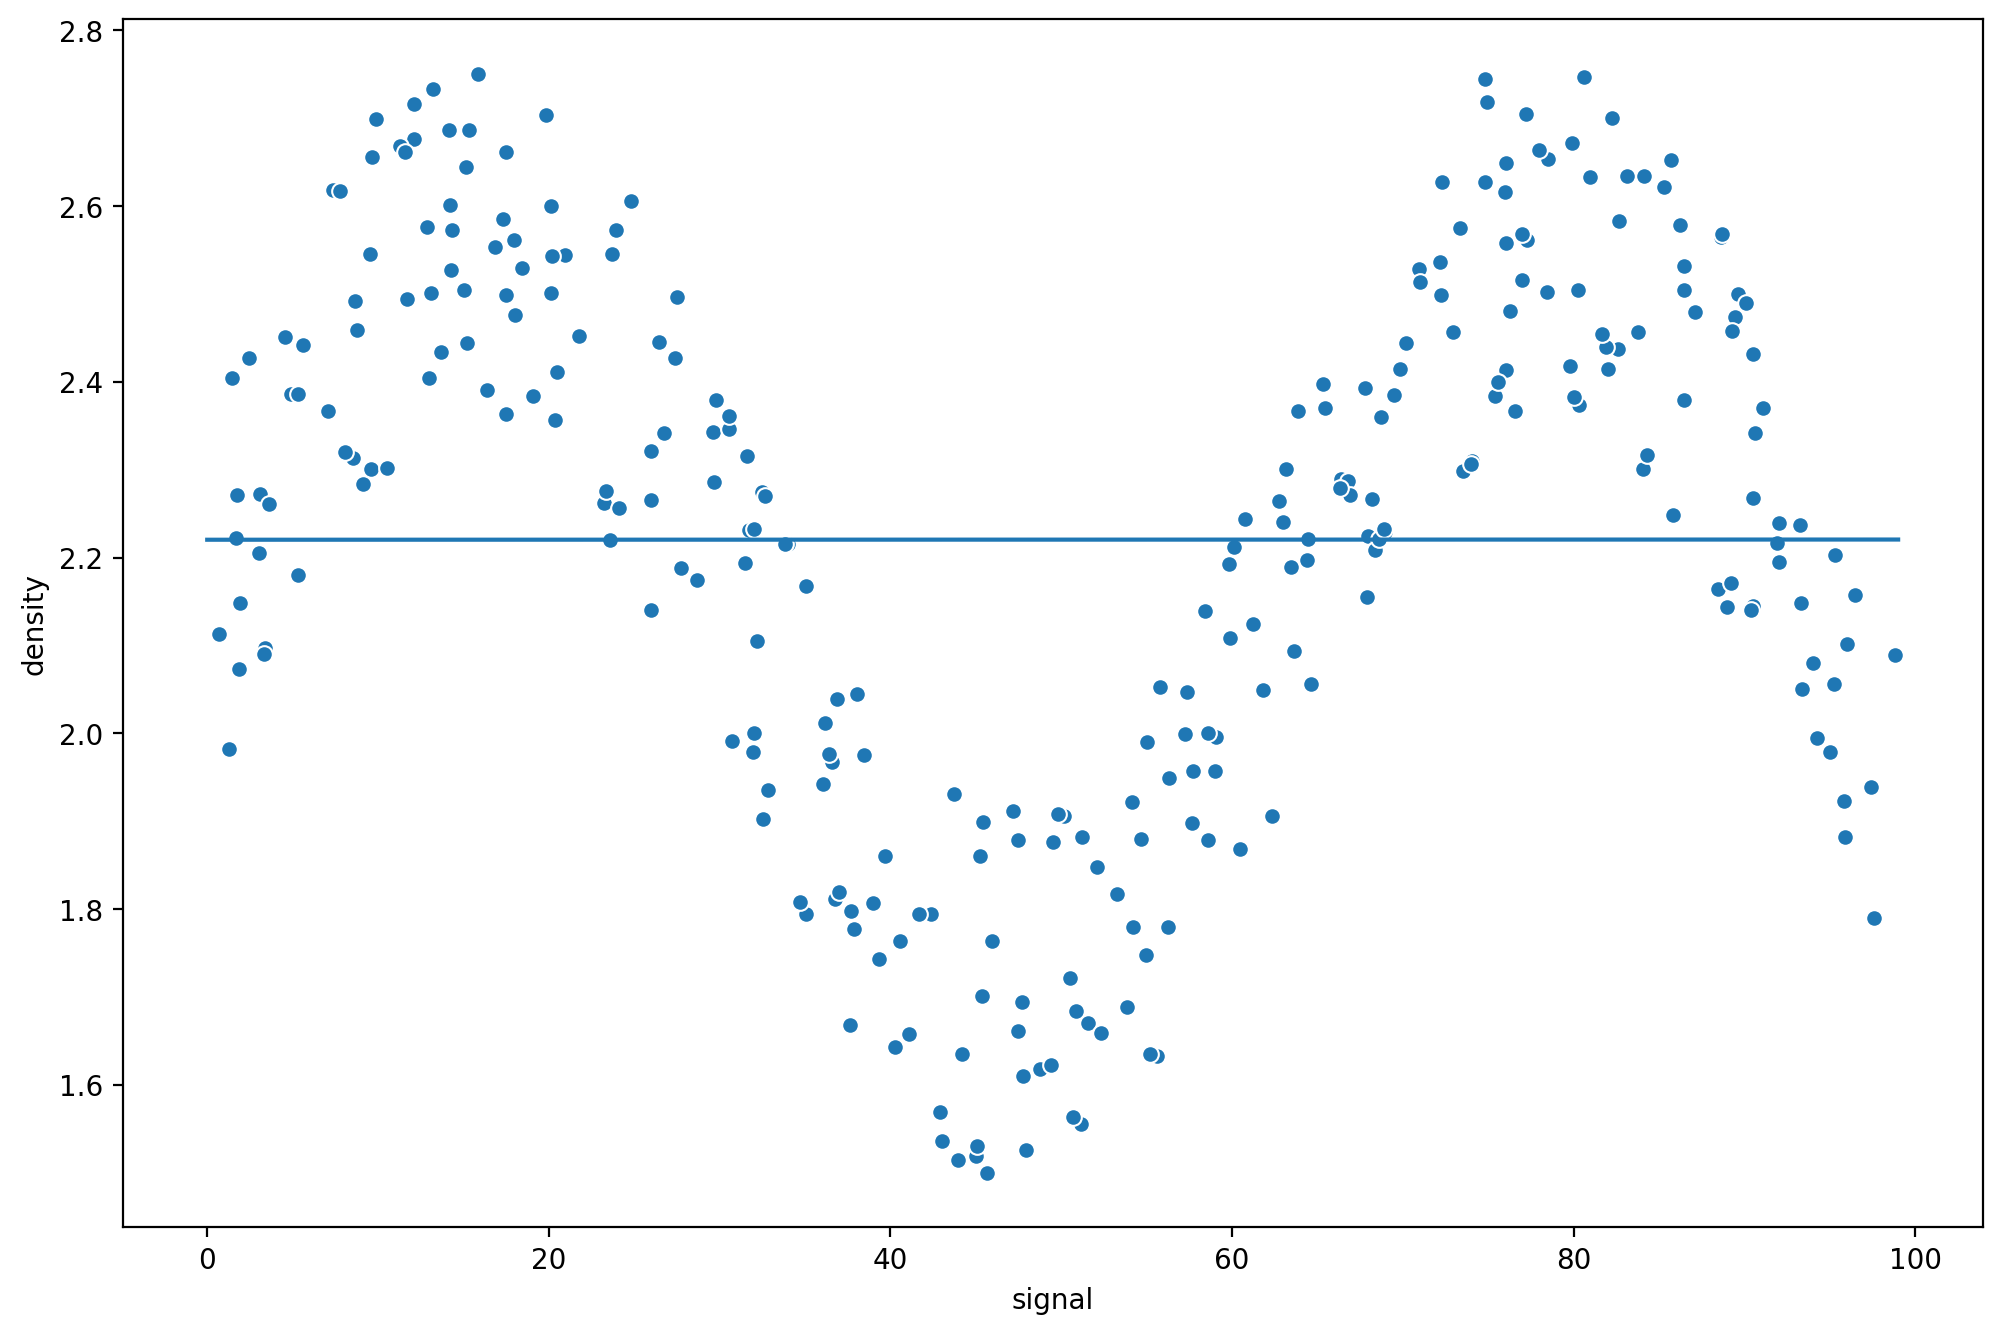

In [31]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='signal',y='density',data=df)


signal_range = np.arange(0,100)
signal_range
signal_pred = LR_model.predict(signal_range.reshape(-1,1))
signal_pred
plt.plot(signal_range, signal_pred)

In [32]:
signal_pred = LR_model.predict(signal_range.reshape(-1,1))

In [33]:
signal_pred

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

In [34]:
##plt.plot(signal_range, signal_pred)

In [35]:
def run_model(model,X_train,y_train,X_test,y_test):
    ## Fit model train
    model.fit(X_train,y_train)
    ##get metrics
    pred = model.predict(X_test)
    MAE= mean_absolute_error(y_test,pred)
    print(f'MAE:{MAE}')
    RMSE = np.sqrt(mean_squared_error(y_test,pred))
    print(f'RMSE:{RMSE}')
    ## Plot the result of model signal range
    signal_range = np.arange(0,100)
    signal_pred = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='signal',y='density',data=df,color = 'red')
    plt.plot(signal_range, signal_pred)
    

MAE:0.211198973318633
RMSE:0.25700519965846297


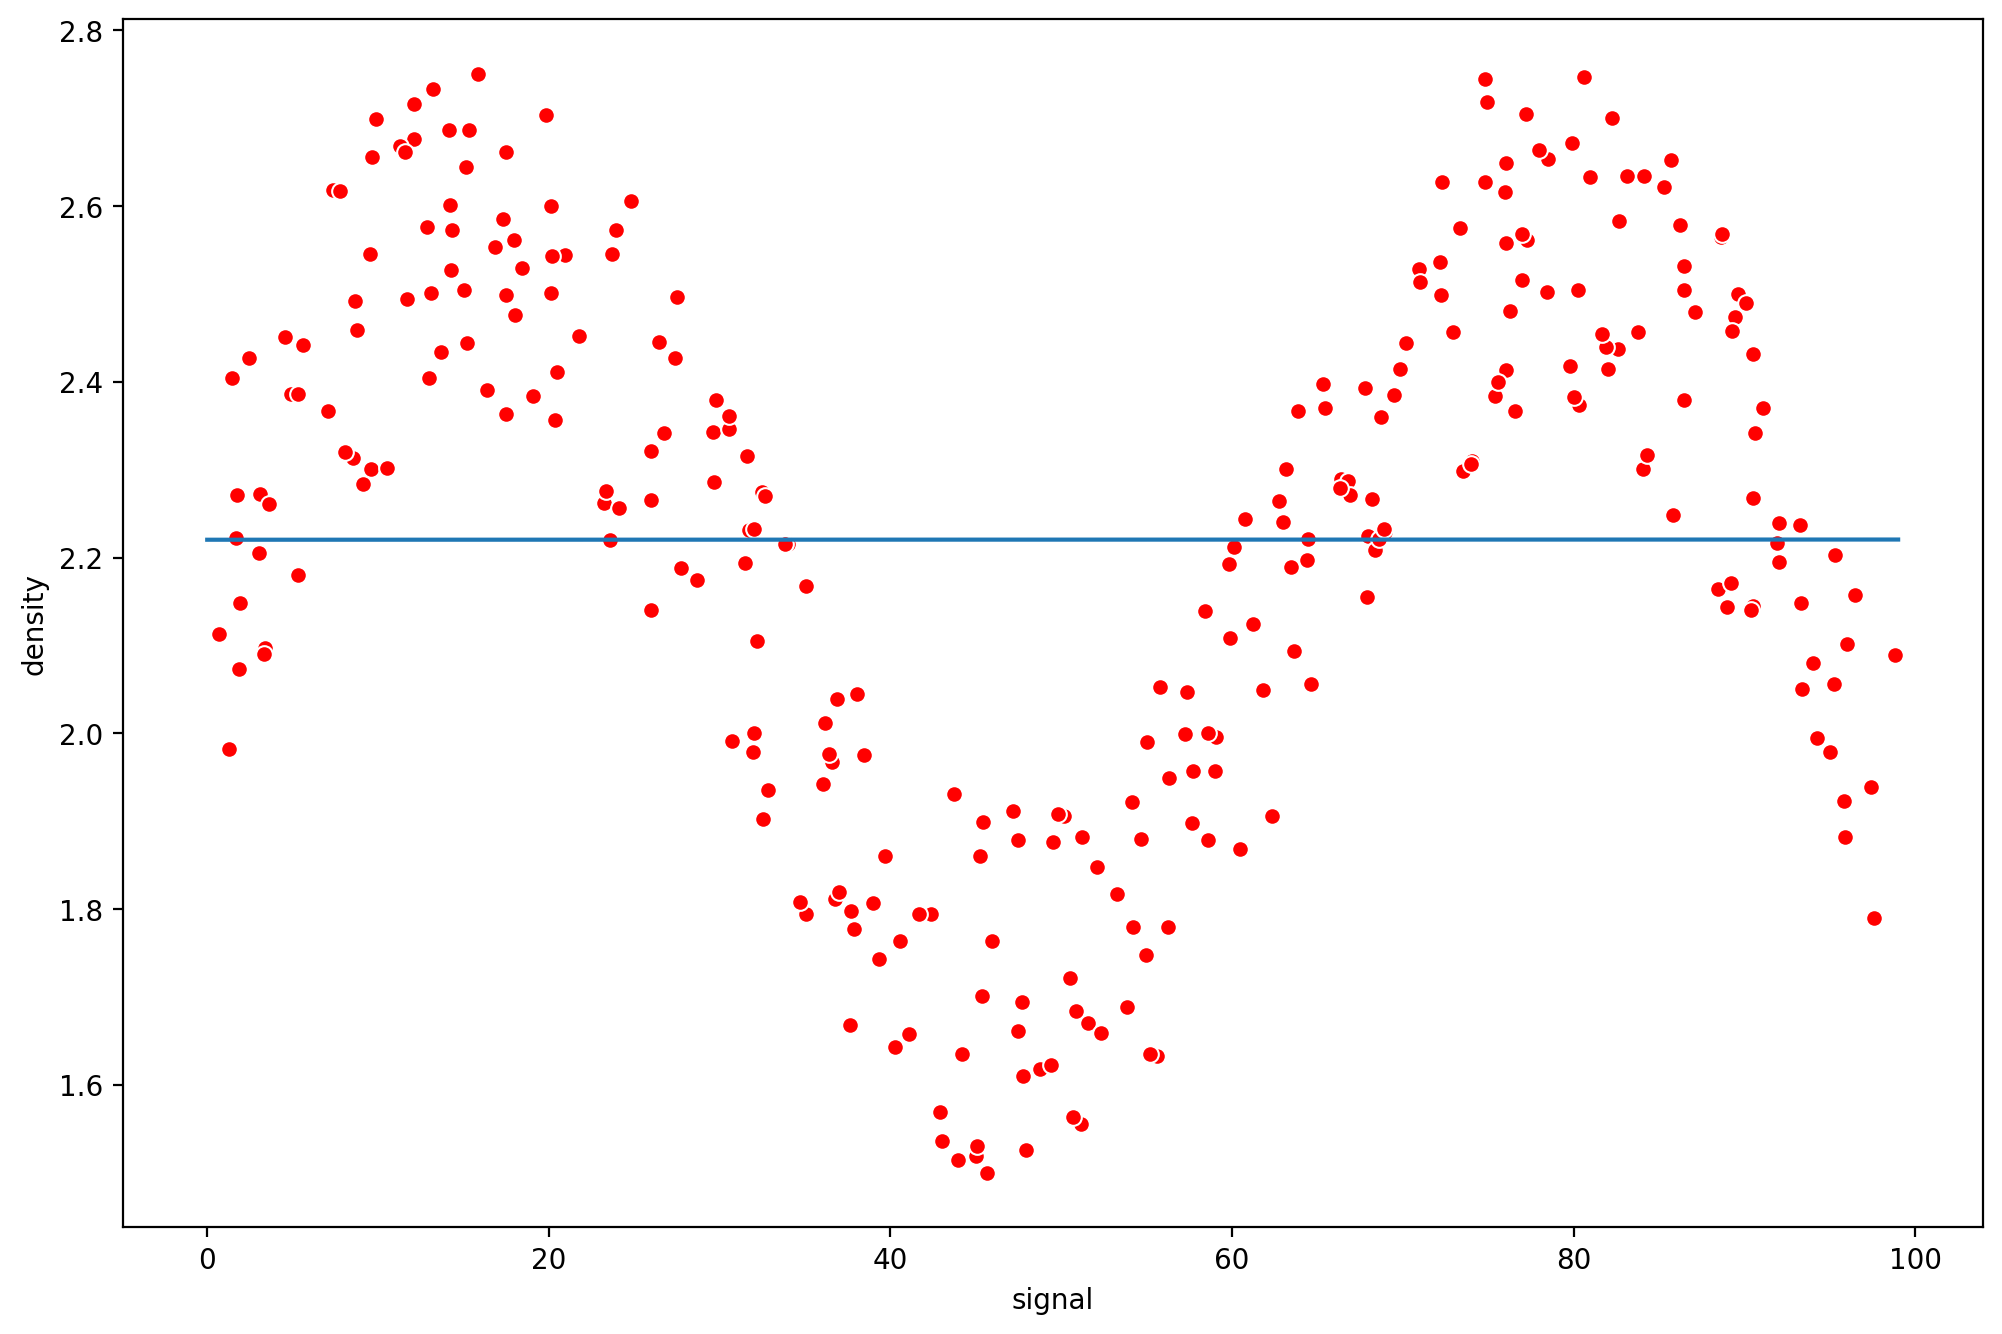

In [36]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MAE:0.22903105443511287
RMSE:0.28173095637255835


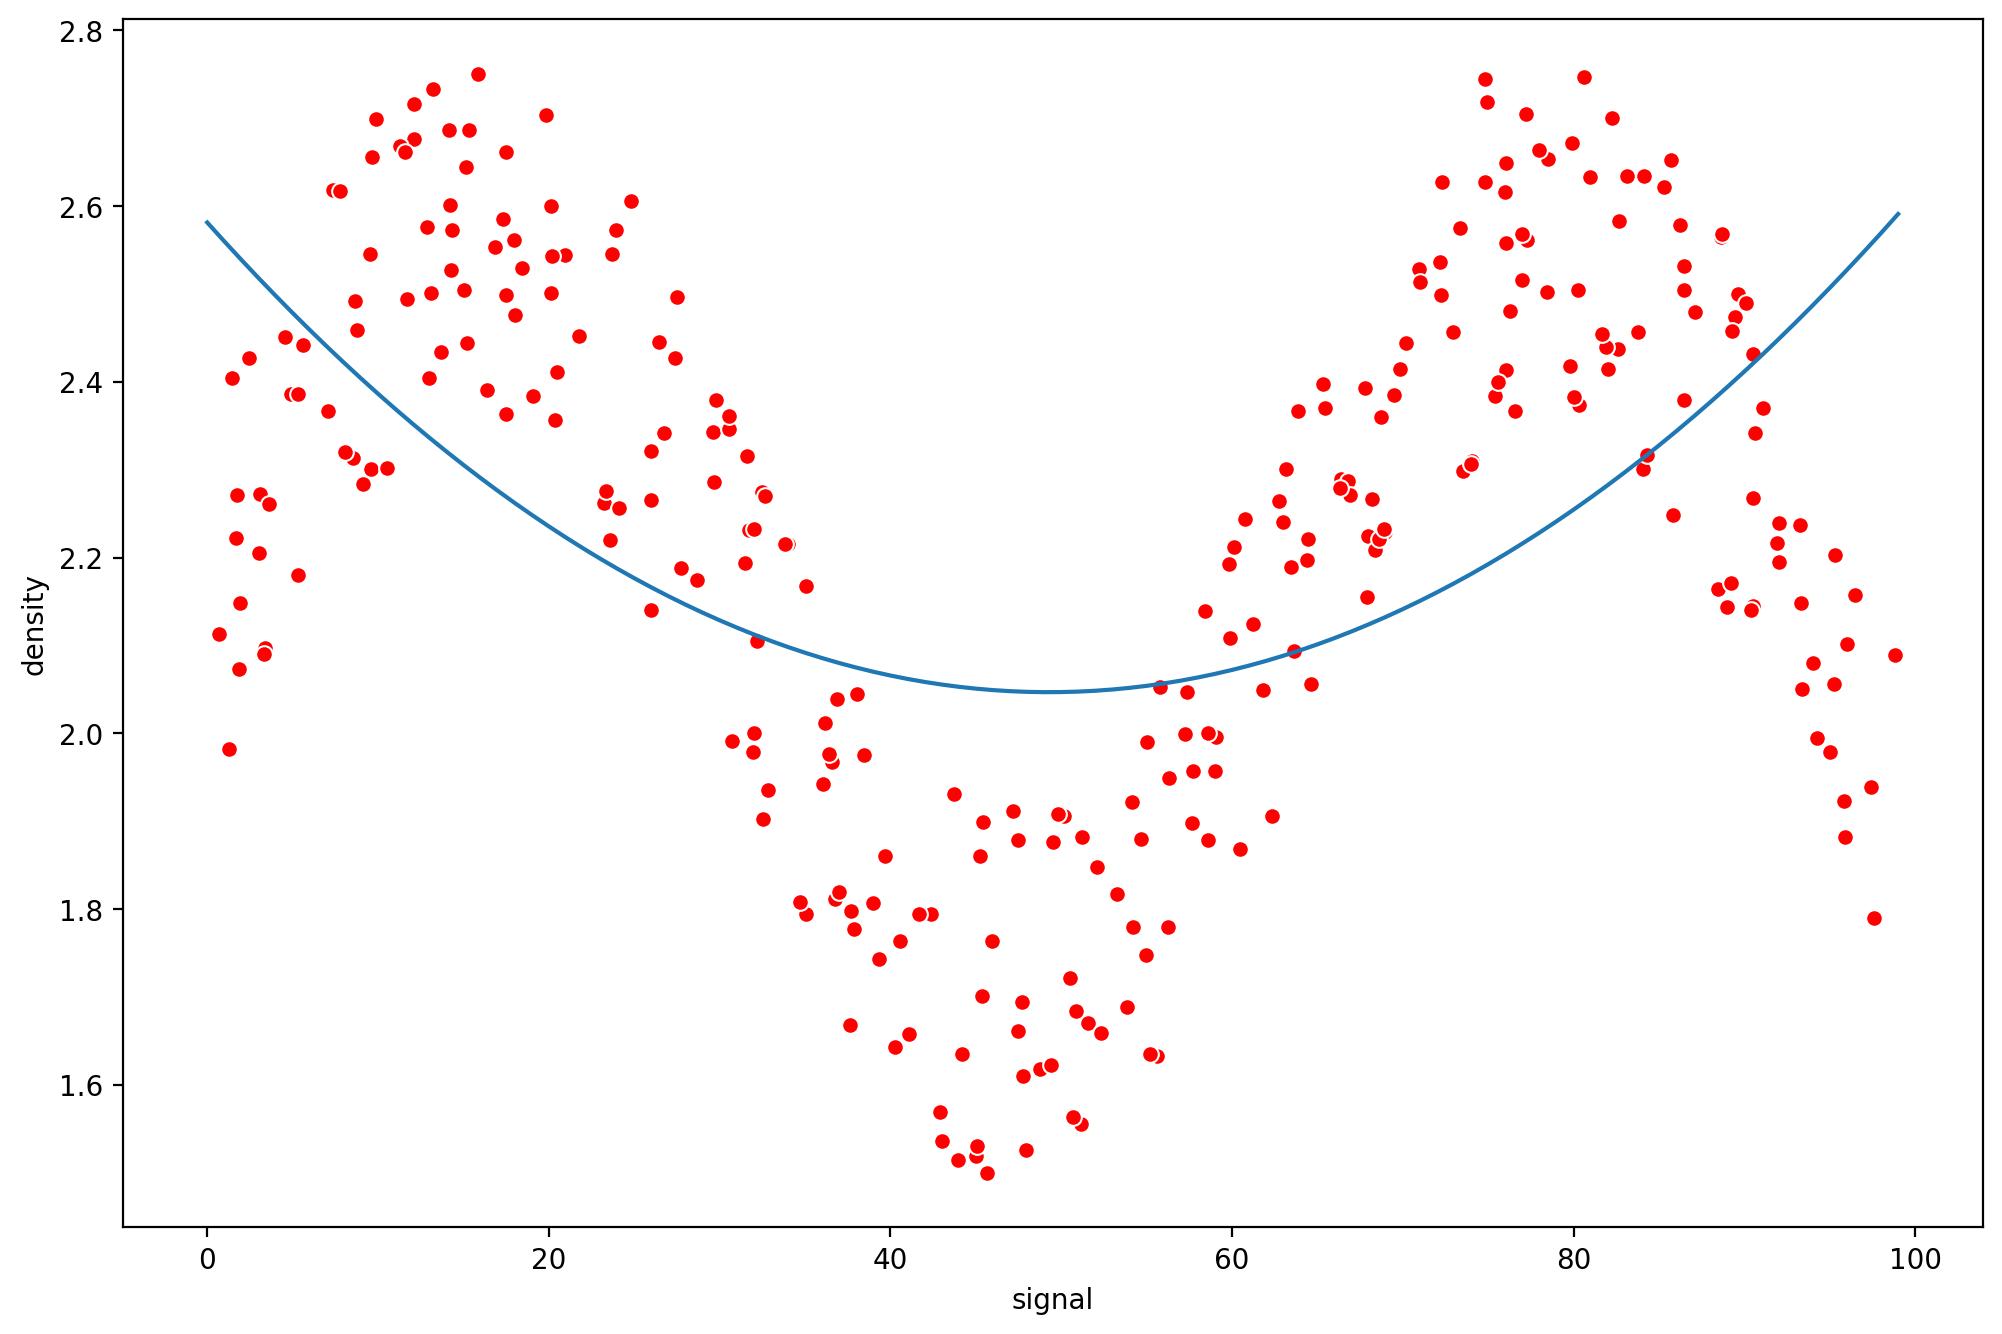

In [39]:
run_model(pipe,X_train,y_train,X_test,y_test)

MAE:0.24211834039539
RMSE:0.287974812792124


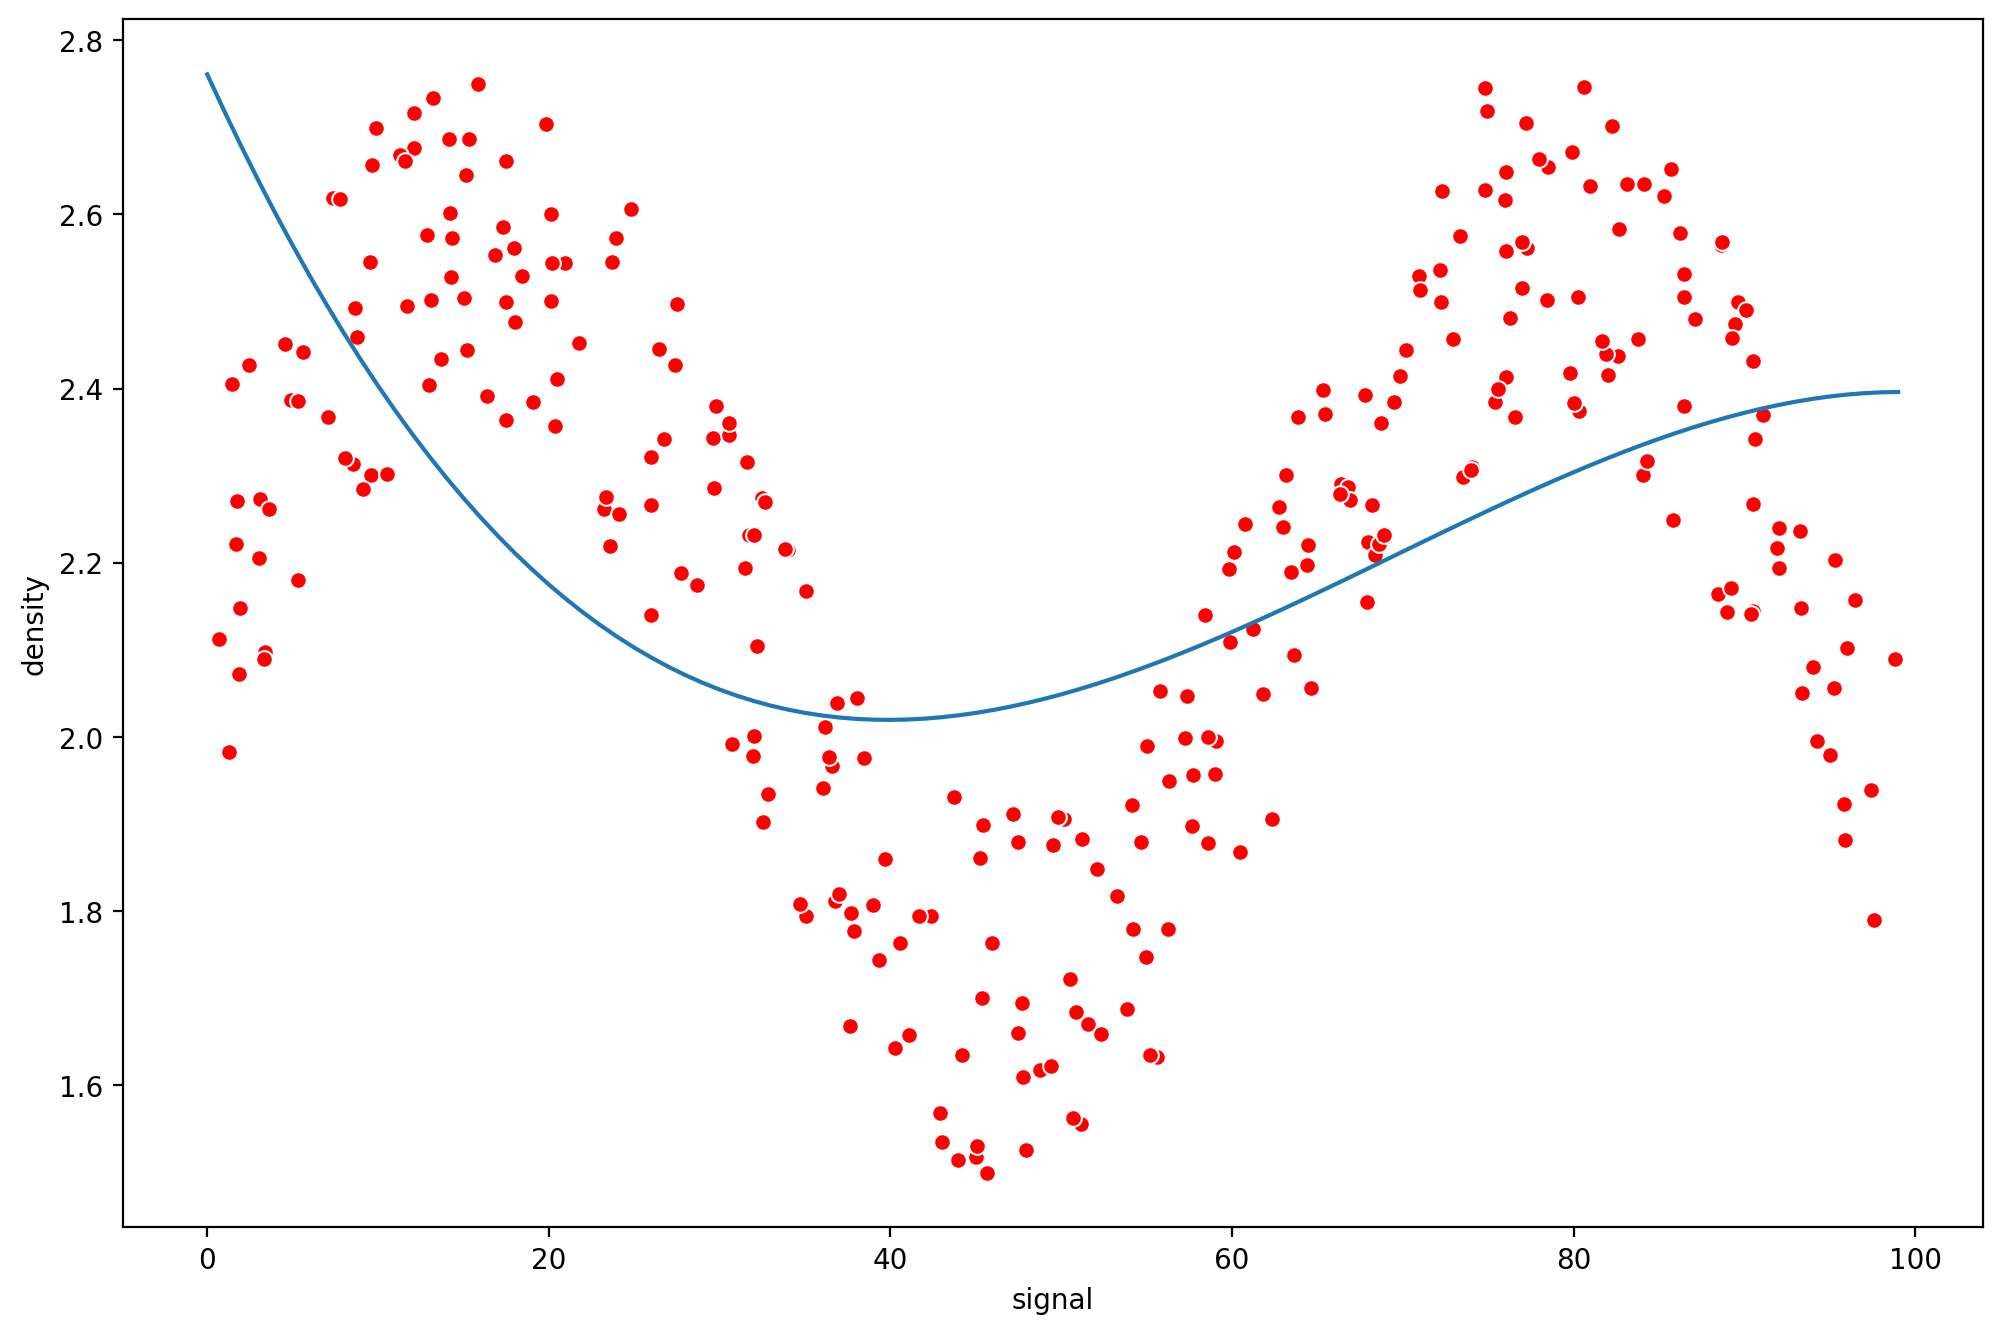

In [40]:
pipe = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

MAE:0.12484333844142978
RMSE:0.1405853826482287


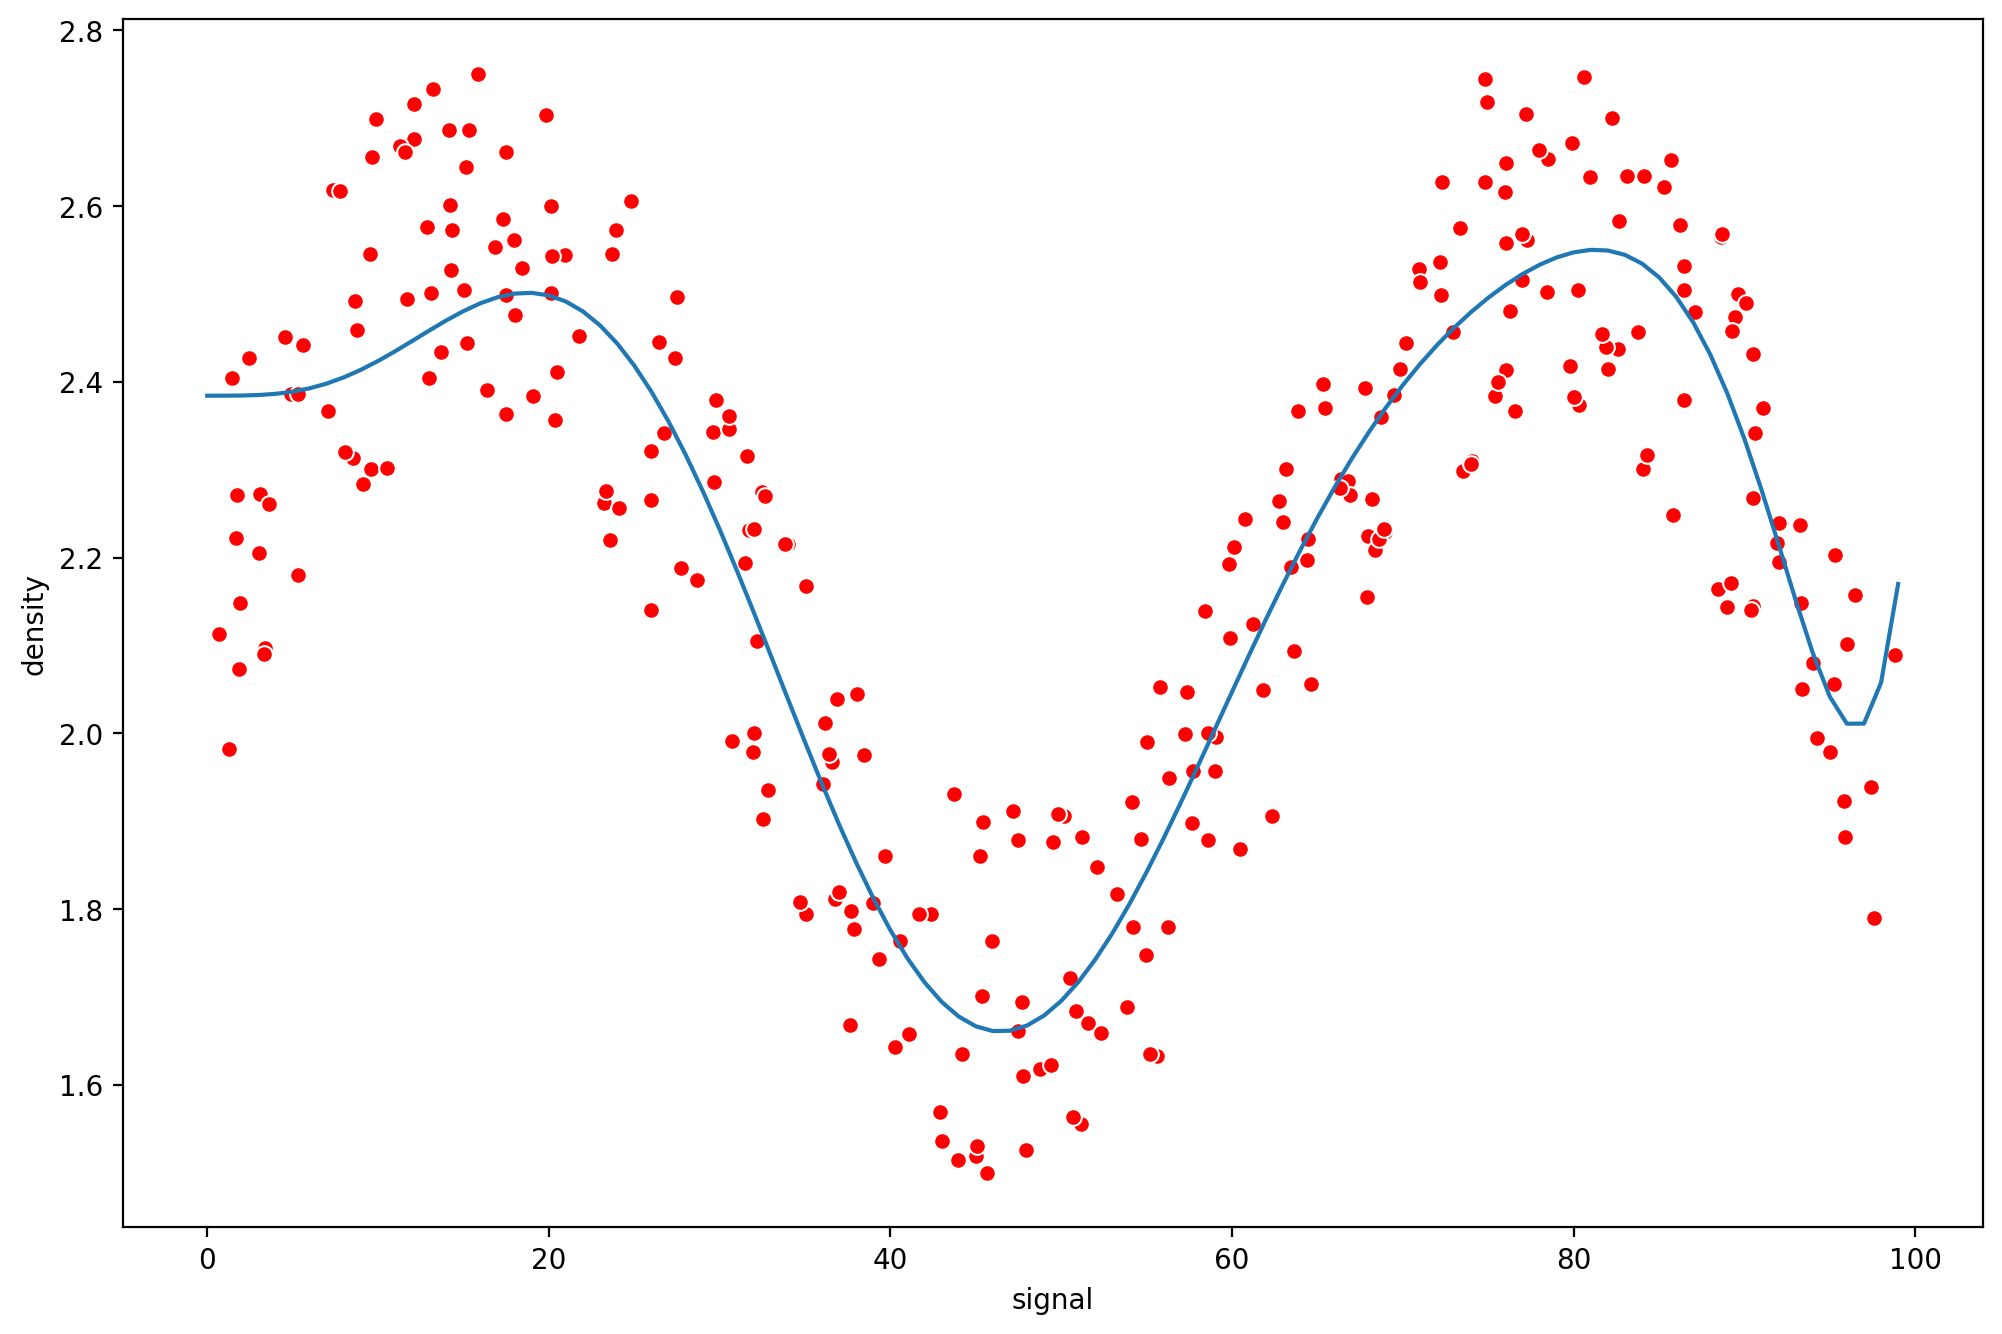

In [41]:
pipe = make_pipeline(PolynomialFeatures(degree=10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

MAE:0.11864313931776478
RMSE:0.14452814890388085


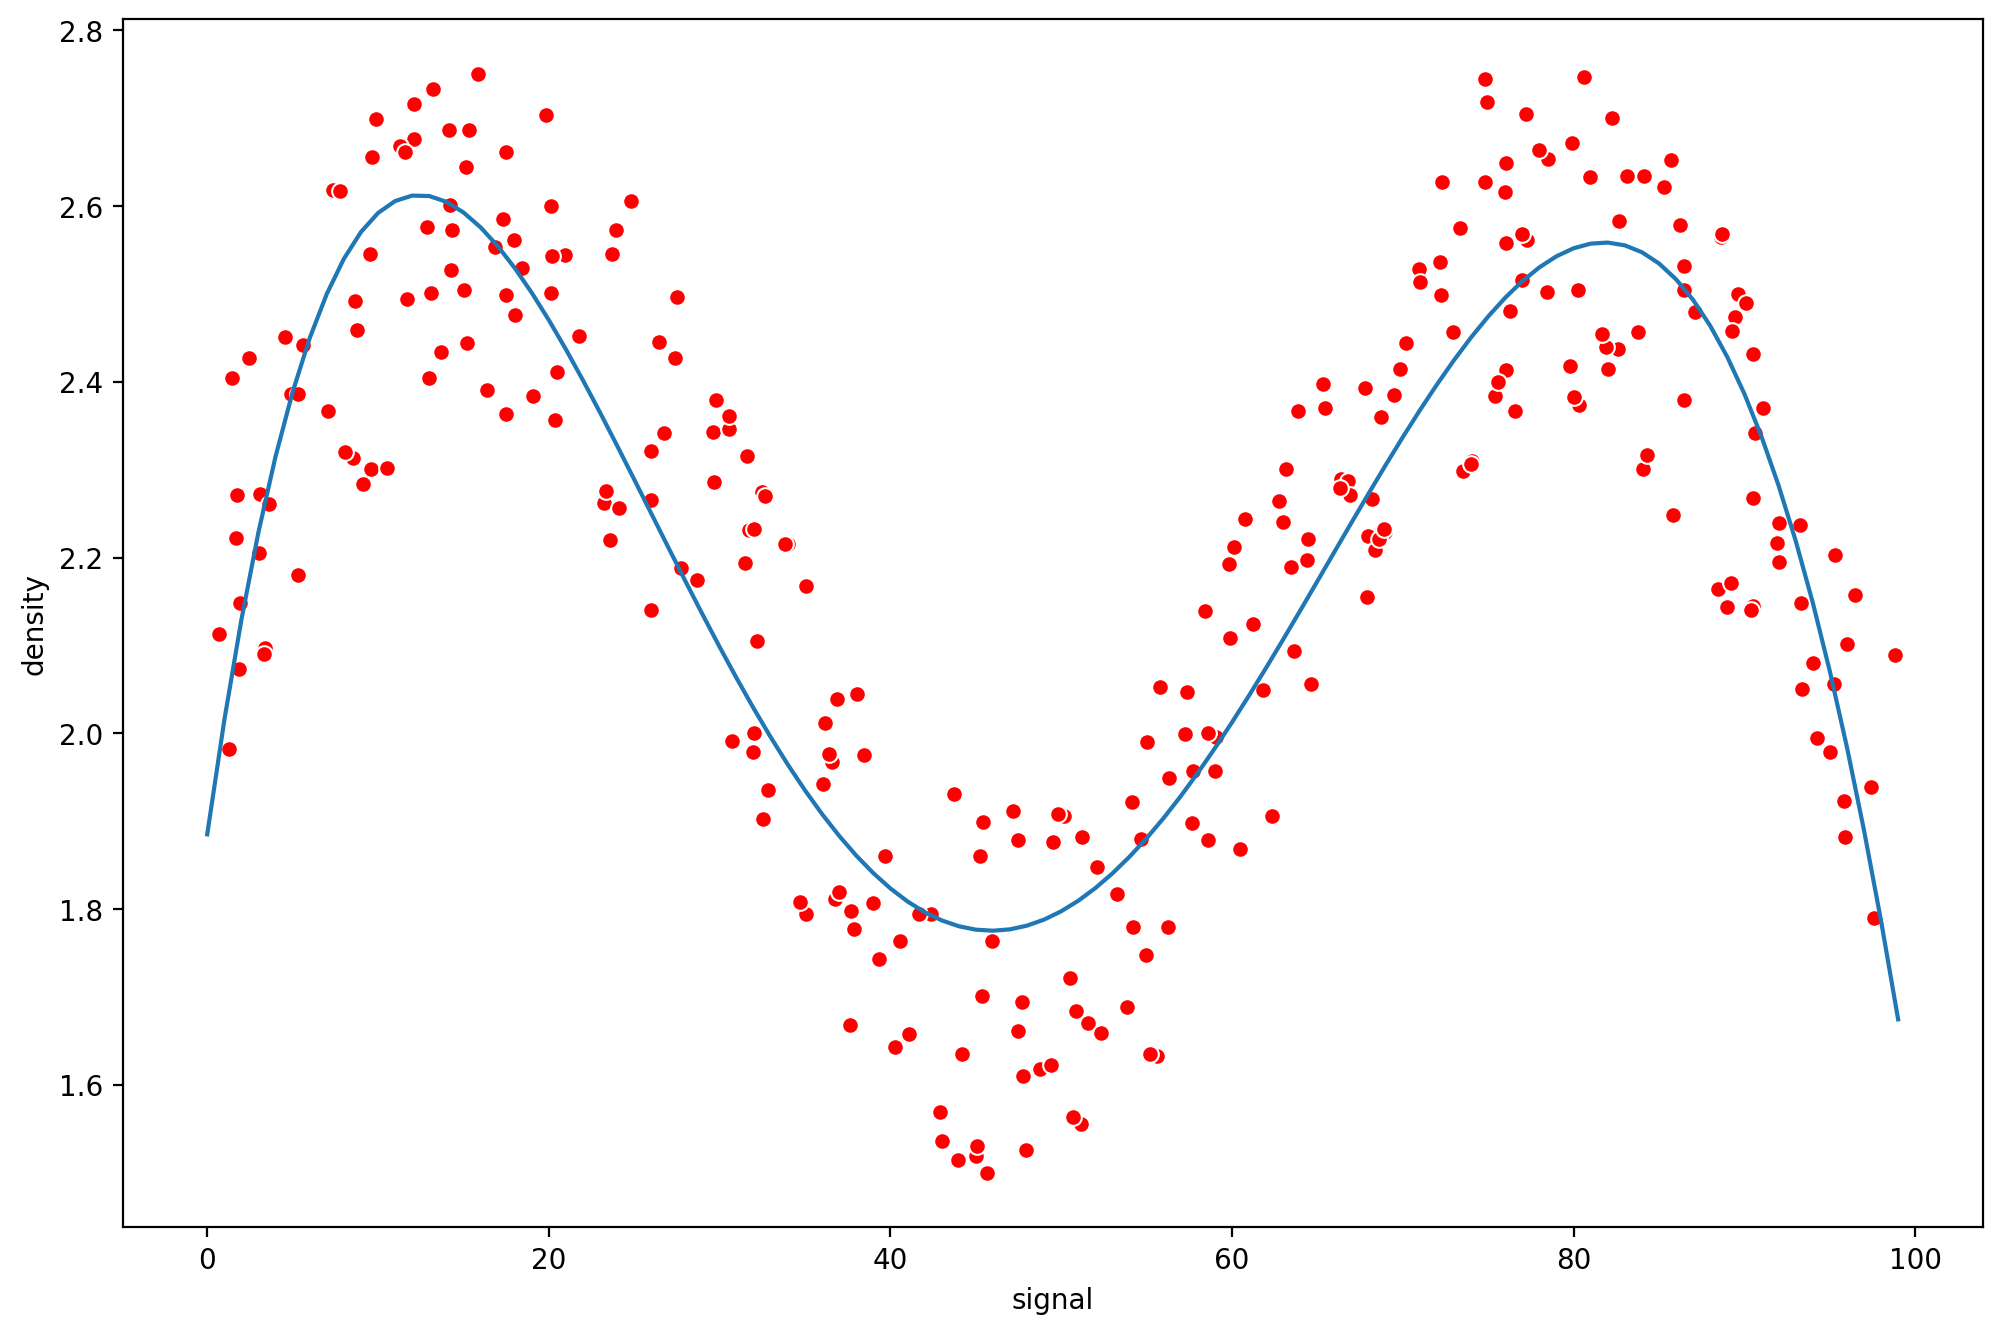

In [42]:
pipe = make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

MAE:0.11908975579114169
RMSE:0.13521994789646744


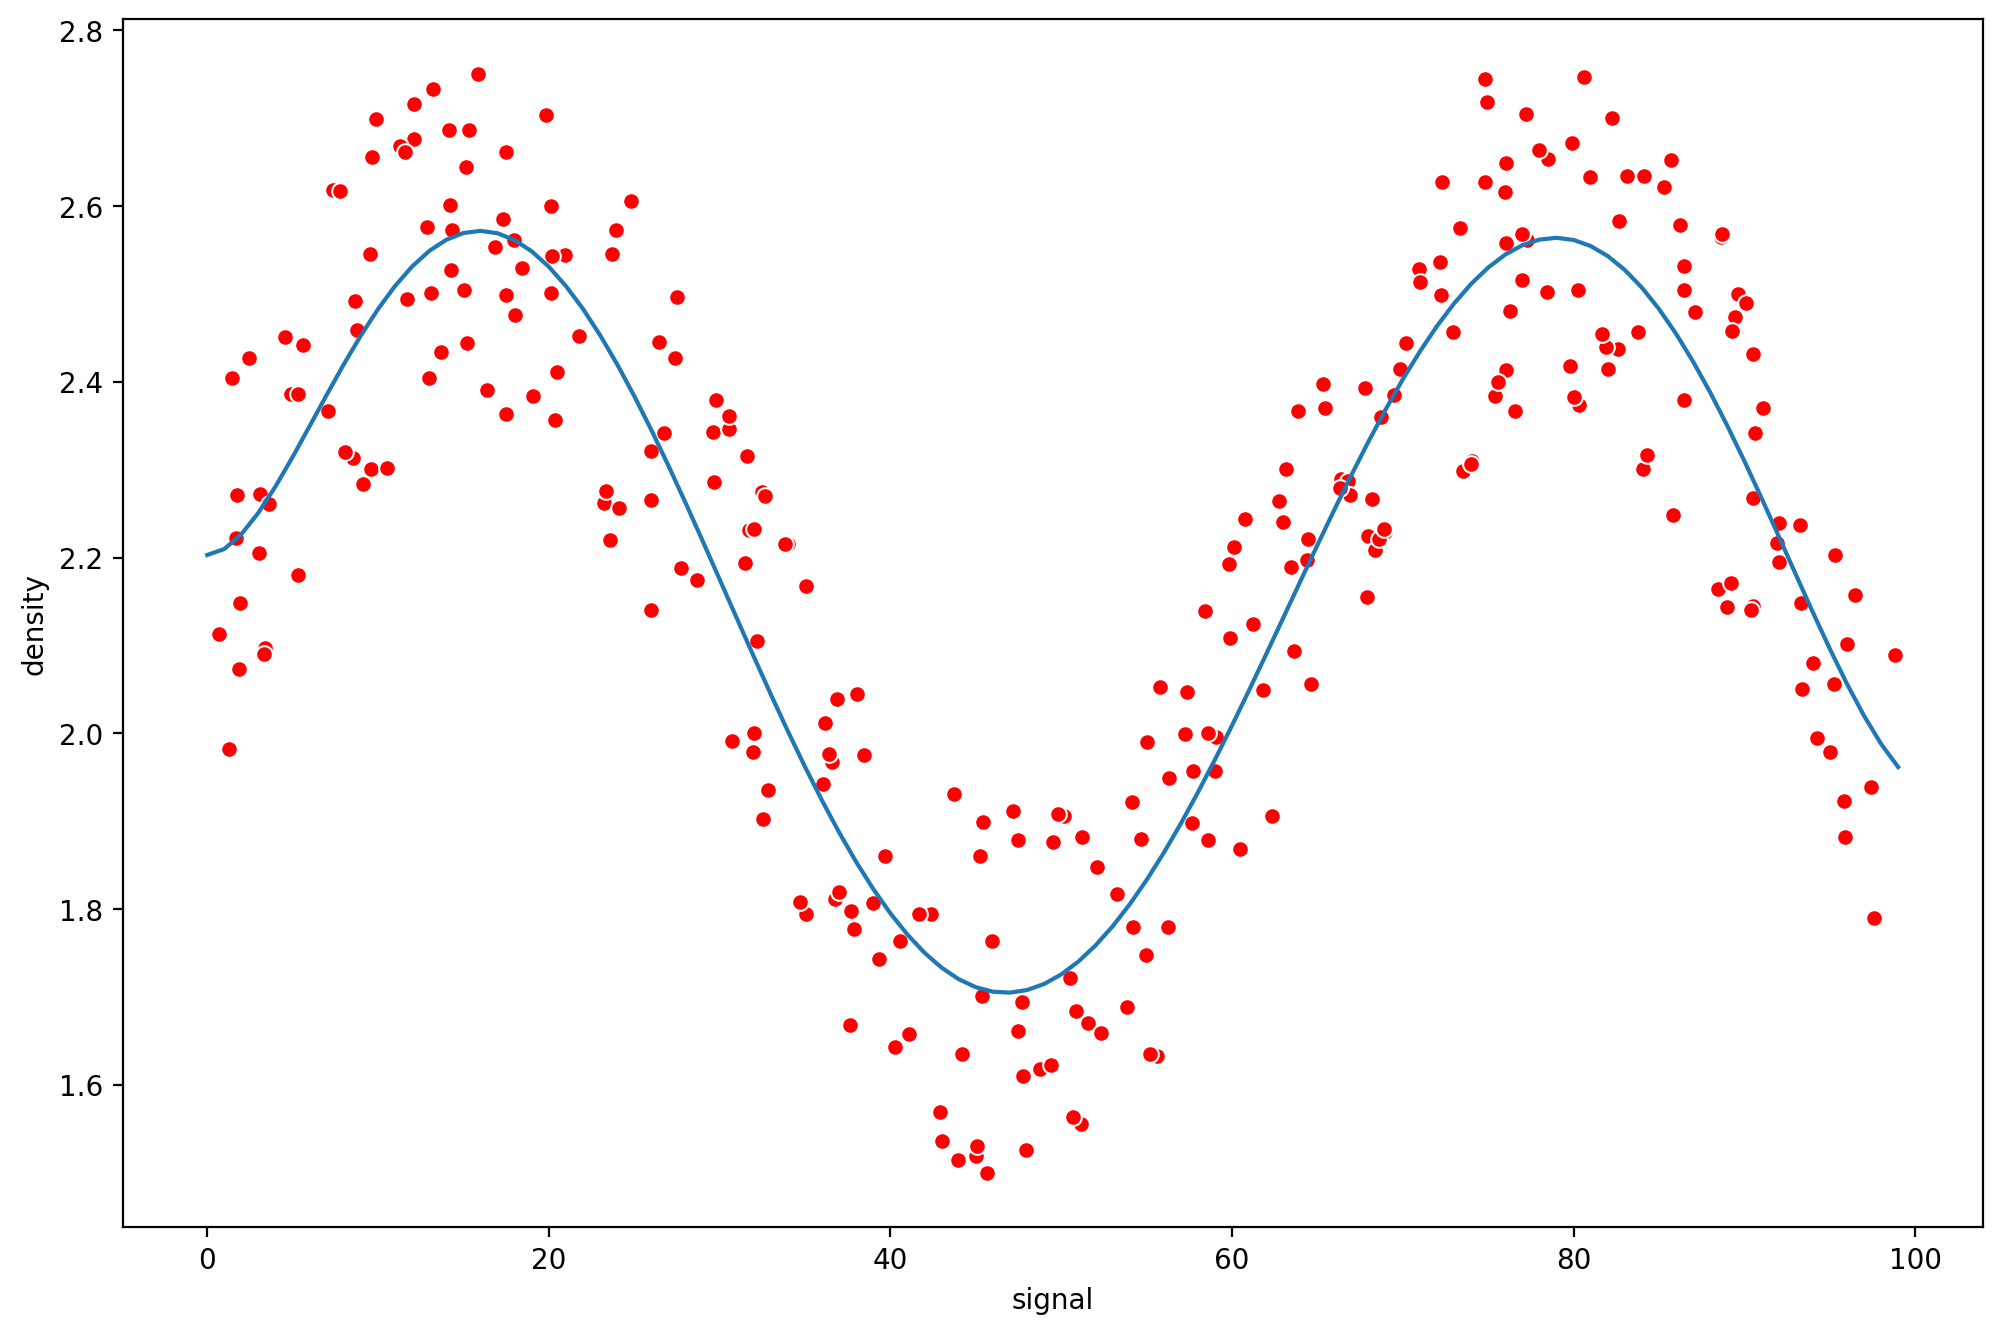

In [43]:
pipe = make_pipeline(PolynomialFeatures(degree=8),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

MAE:0.11881347417225019
RMSE:0.1361581433075308


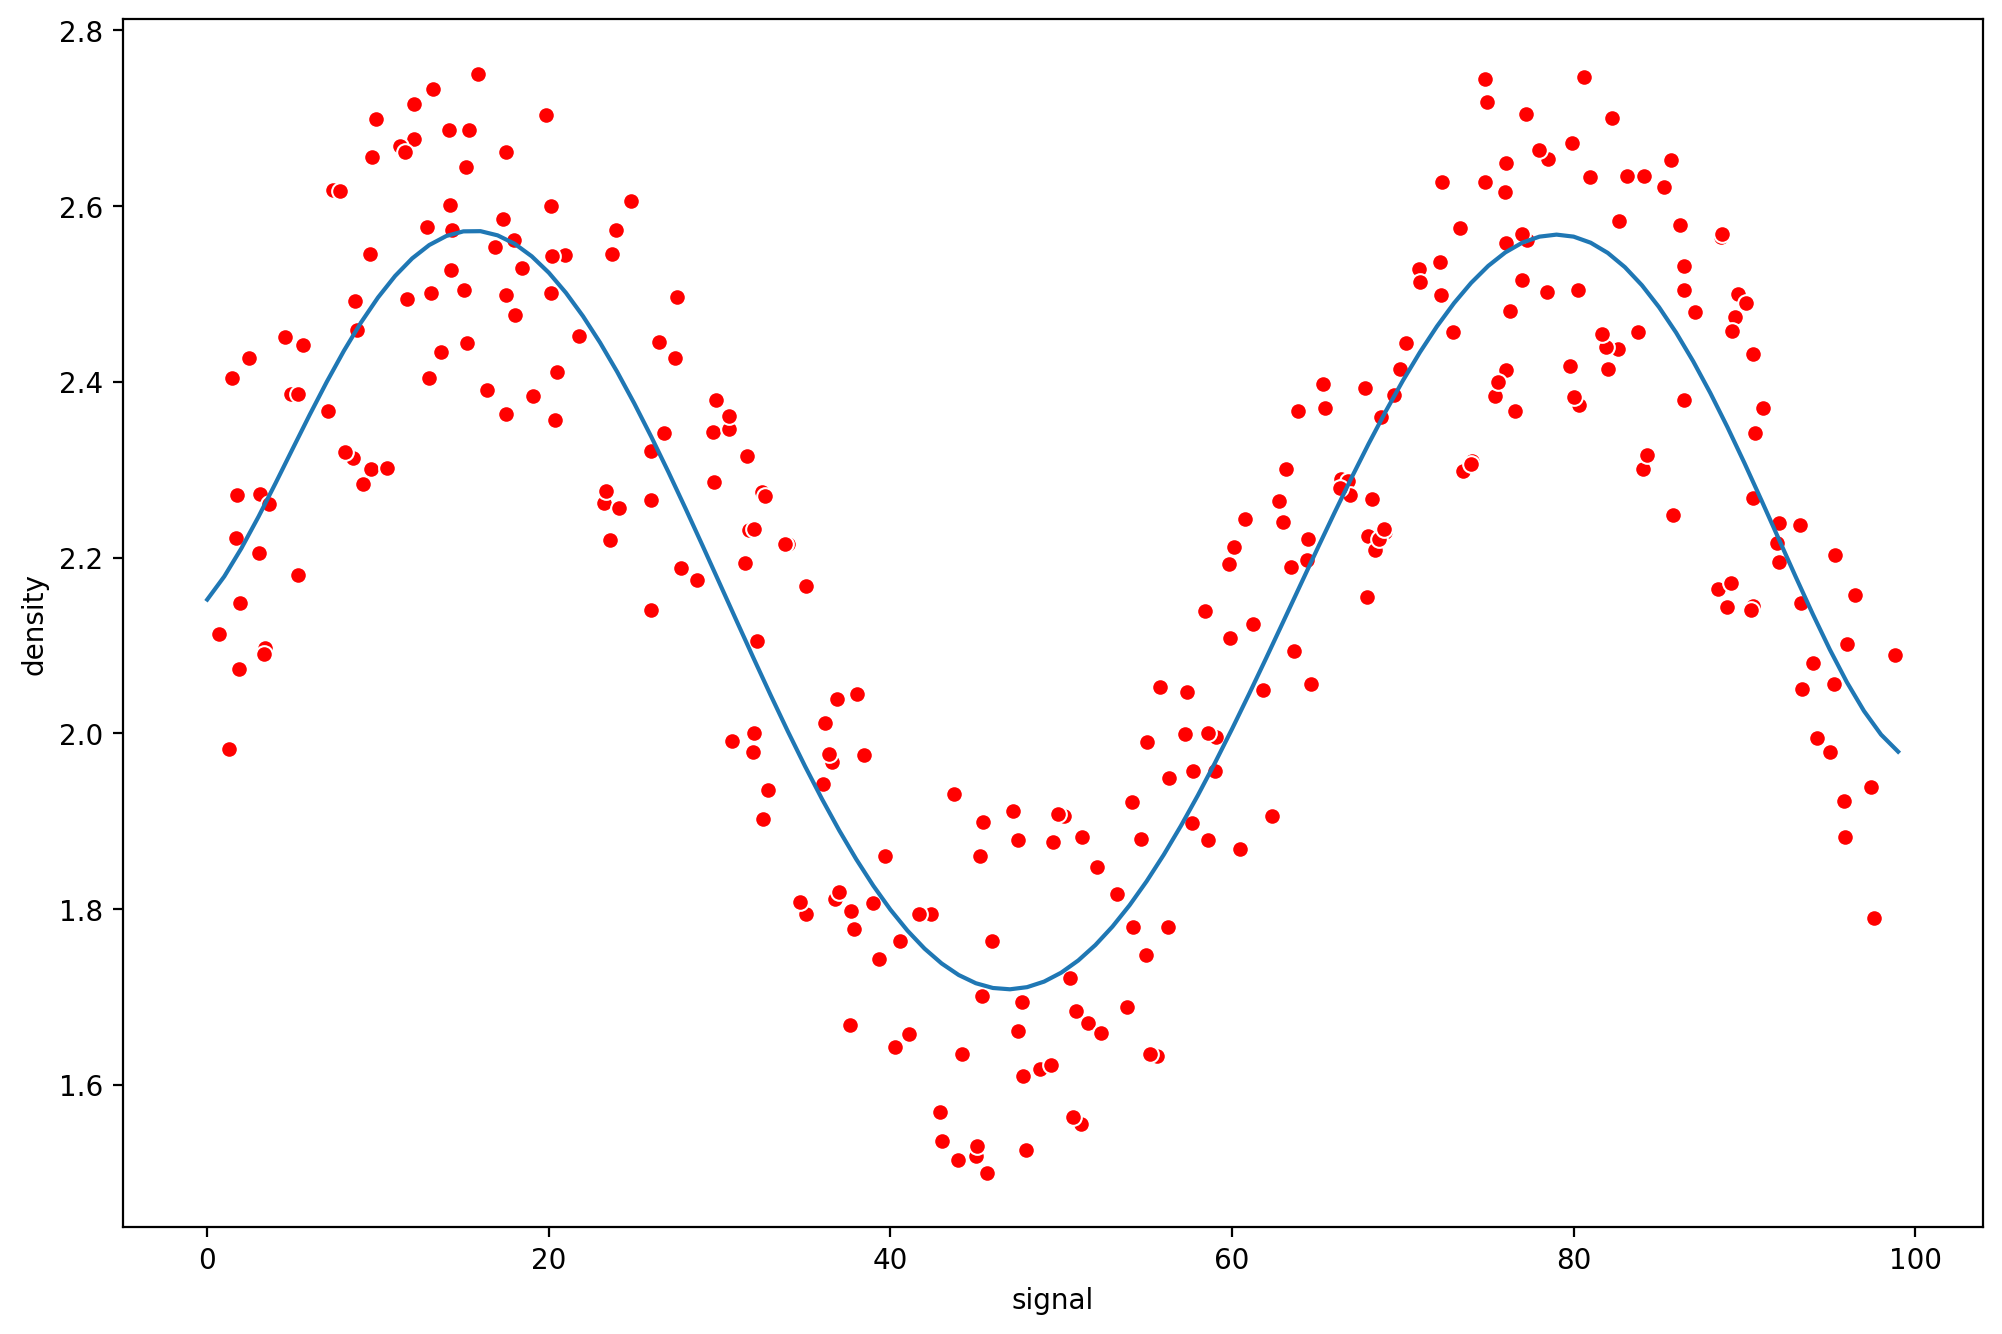

In [44]:
pipe = make_pipeline(PolynomialFeatures(degree=7),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.11877297474442382
RMSE:0.15234870286353372
MAE:0.12220524225759936
RMSE:0.14026621441401854
MAE:0.12198383614100564
RMSE:0.13730685016923655
MAE:0.12098684435198172
RMSE:0.1389576825931881
MAE:0.11635971693292672
RMSE:0.13277855732740926
MAE:0.1207030971917154
RMSE:0.13974991273788953
MAE:0.12878322504026188
RMSE:0.151321497164368
MAE:0.13363165935705315
RMSE:0.15954234753677107
MAE:0.1415954048743758
RMSE:0.17121407464262492
MAE:0.14654899132830163
RMSE:0.1790848942106036


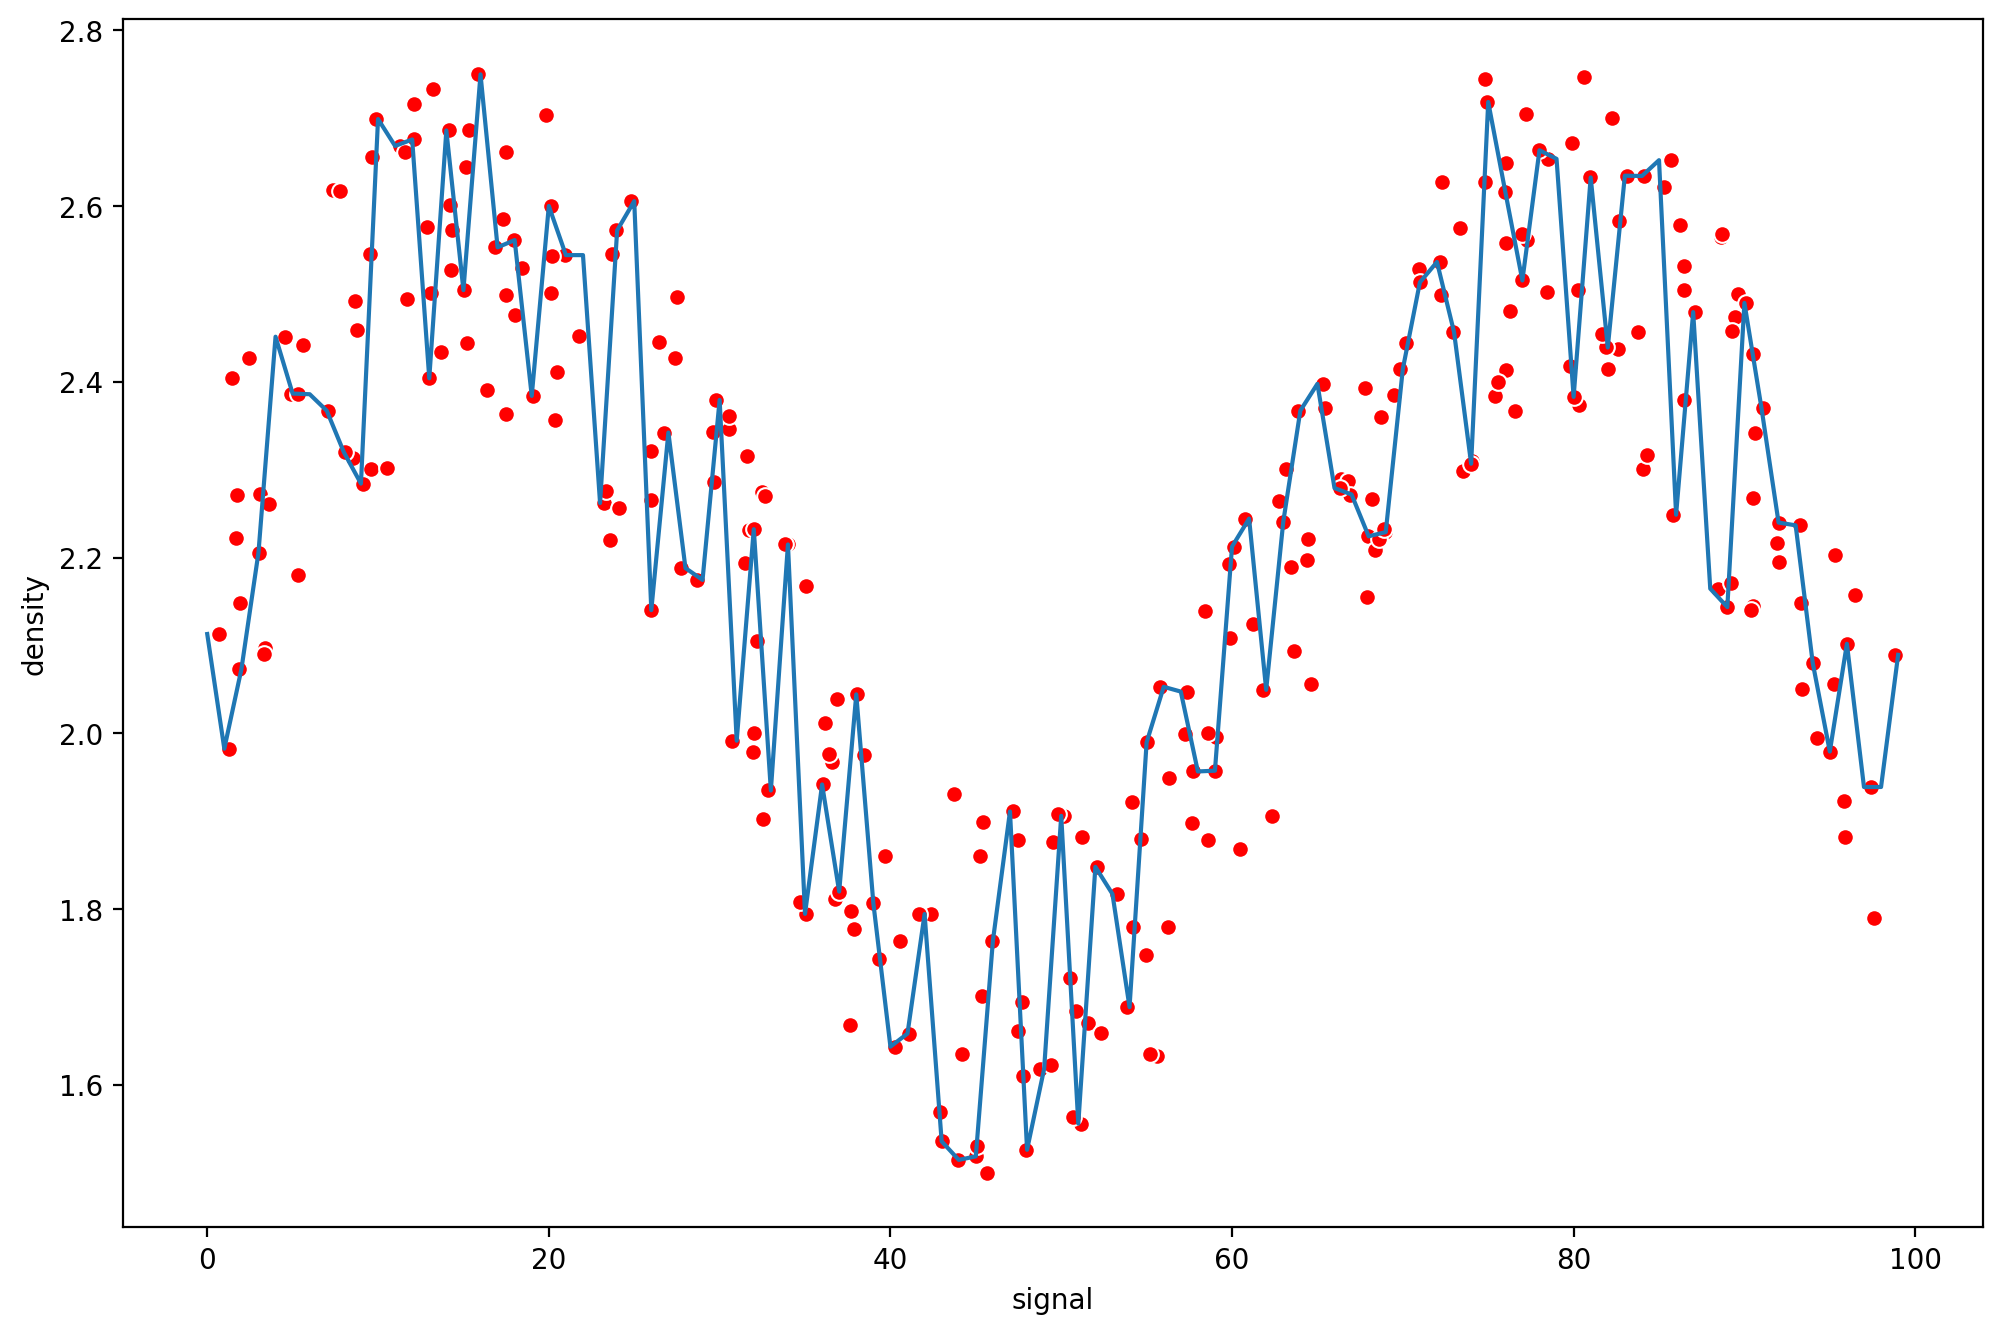

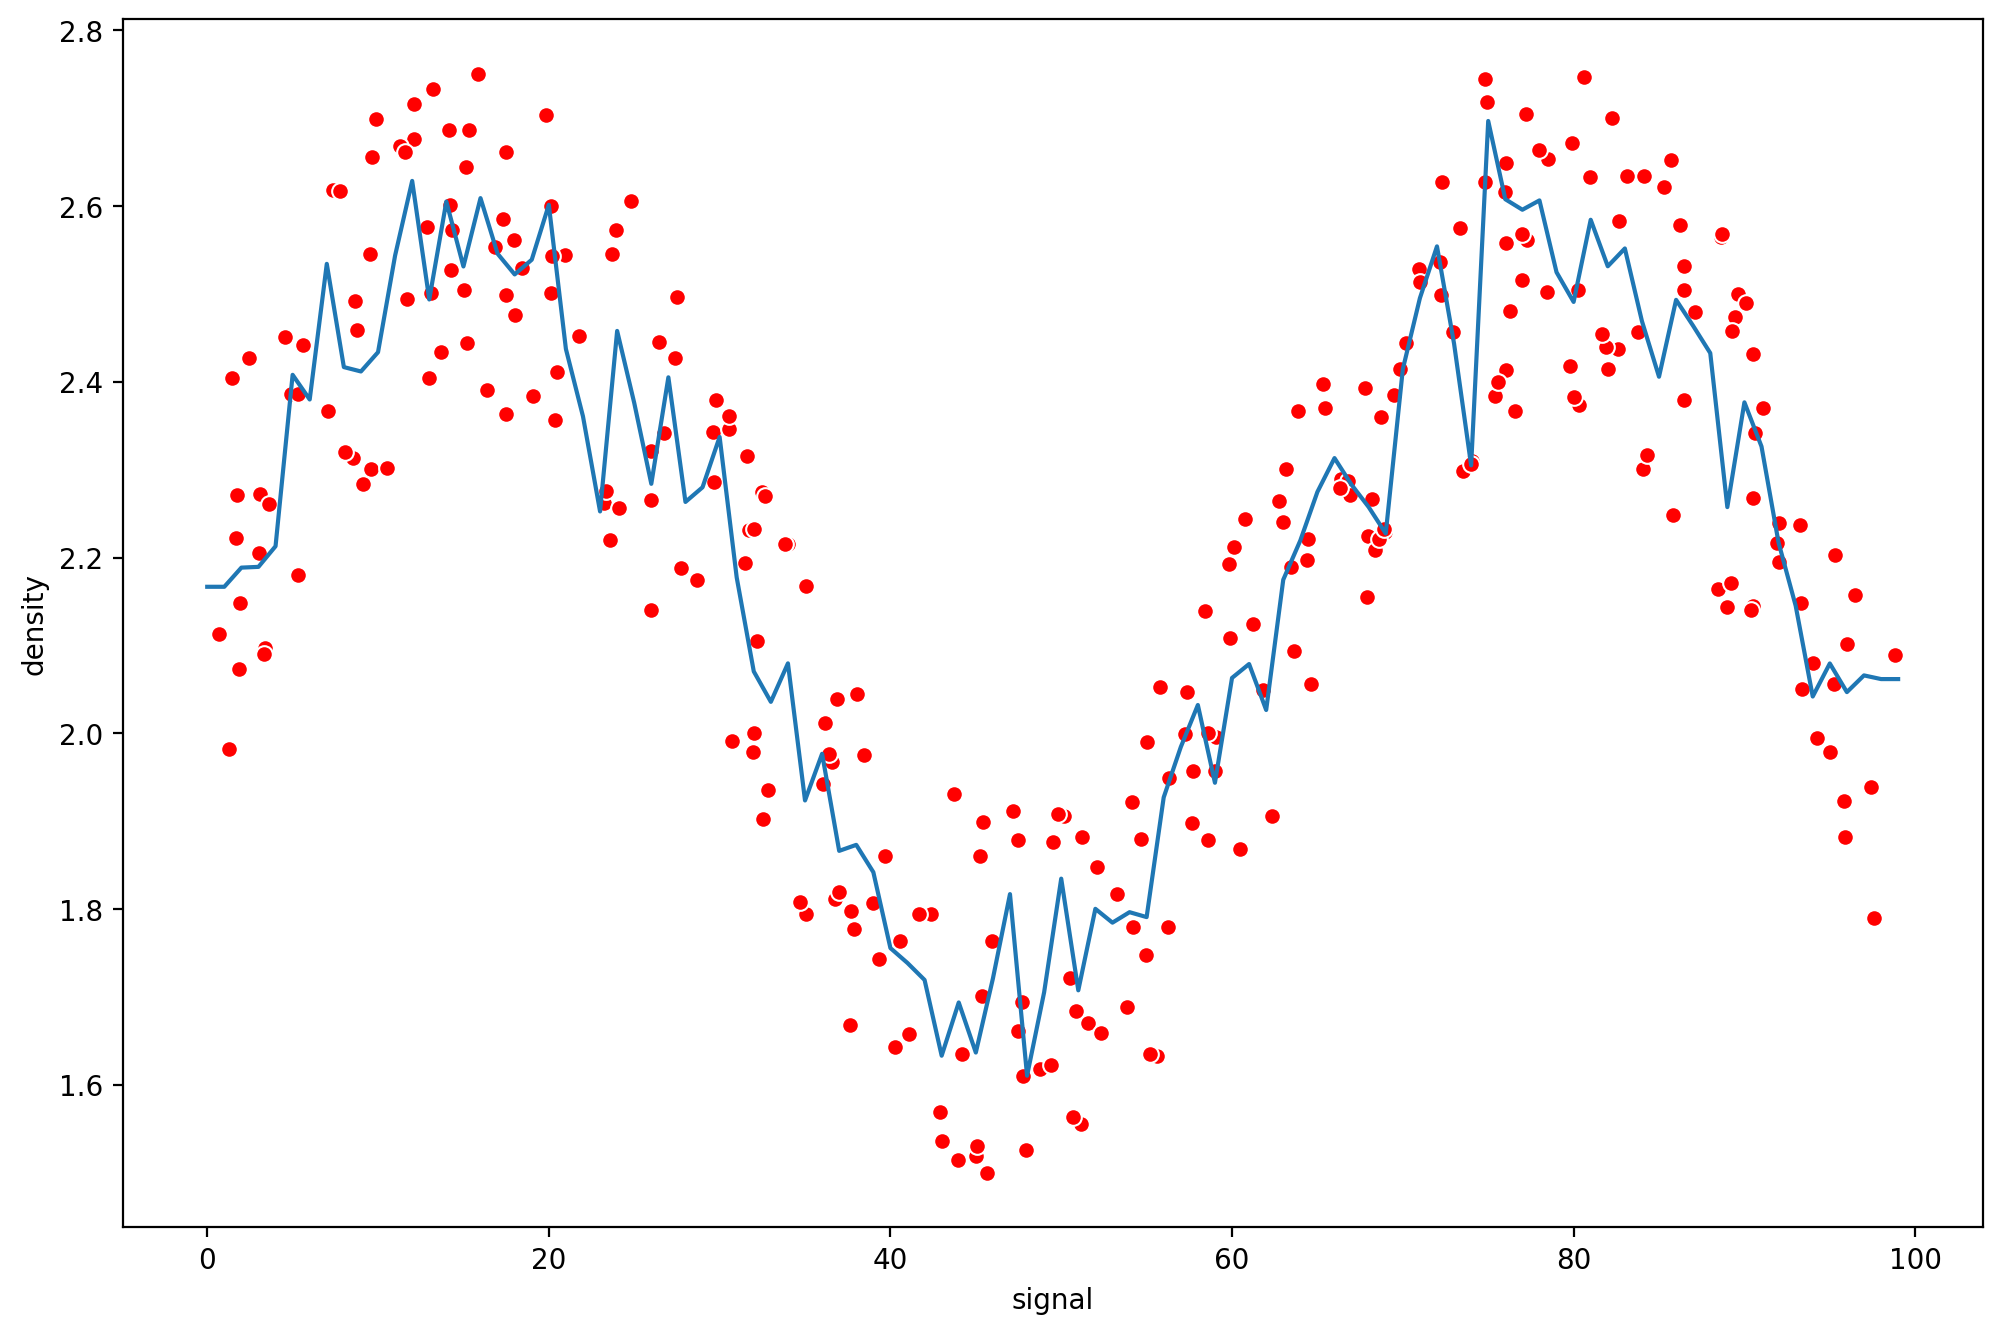

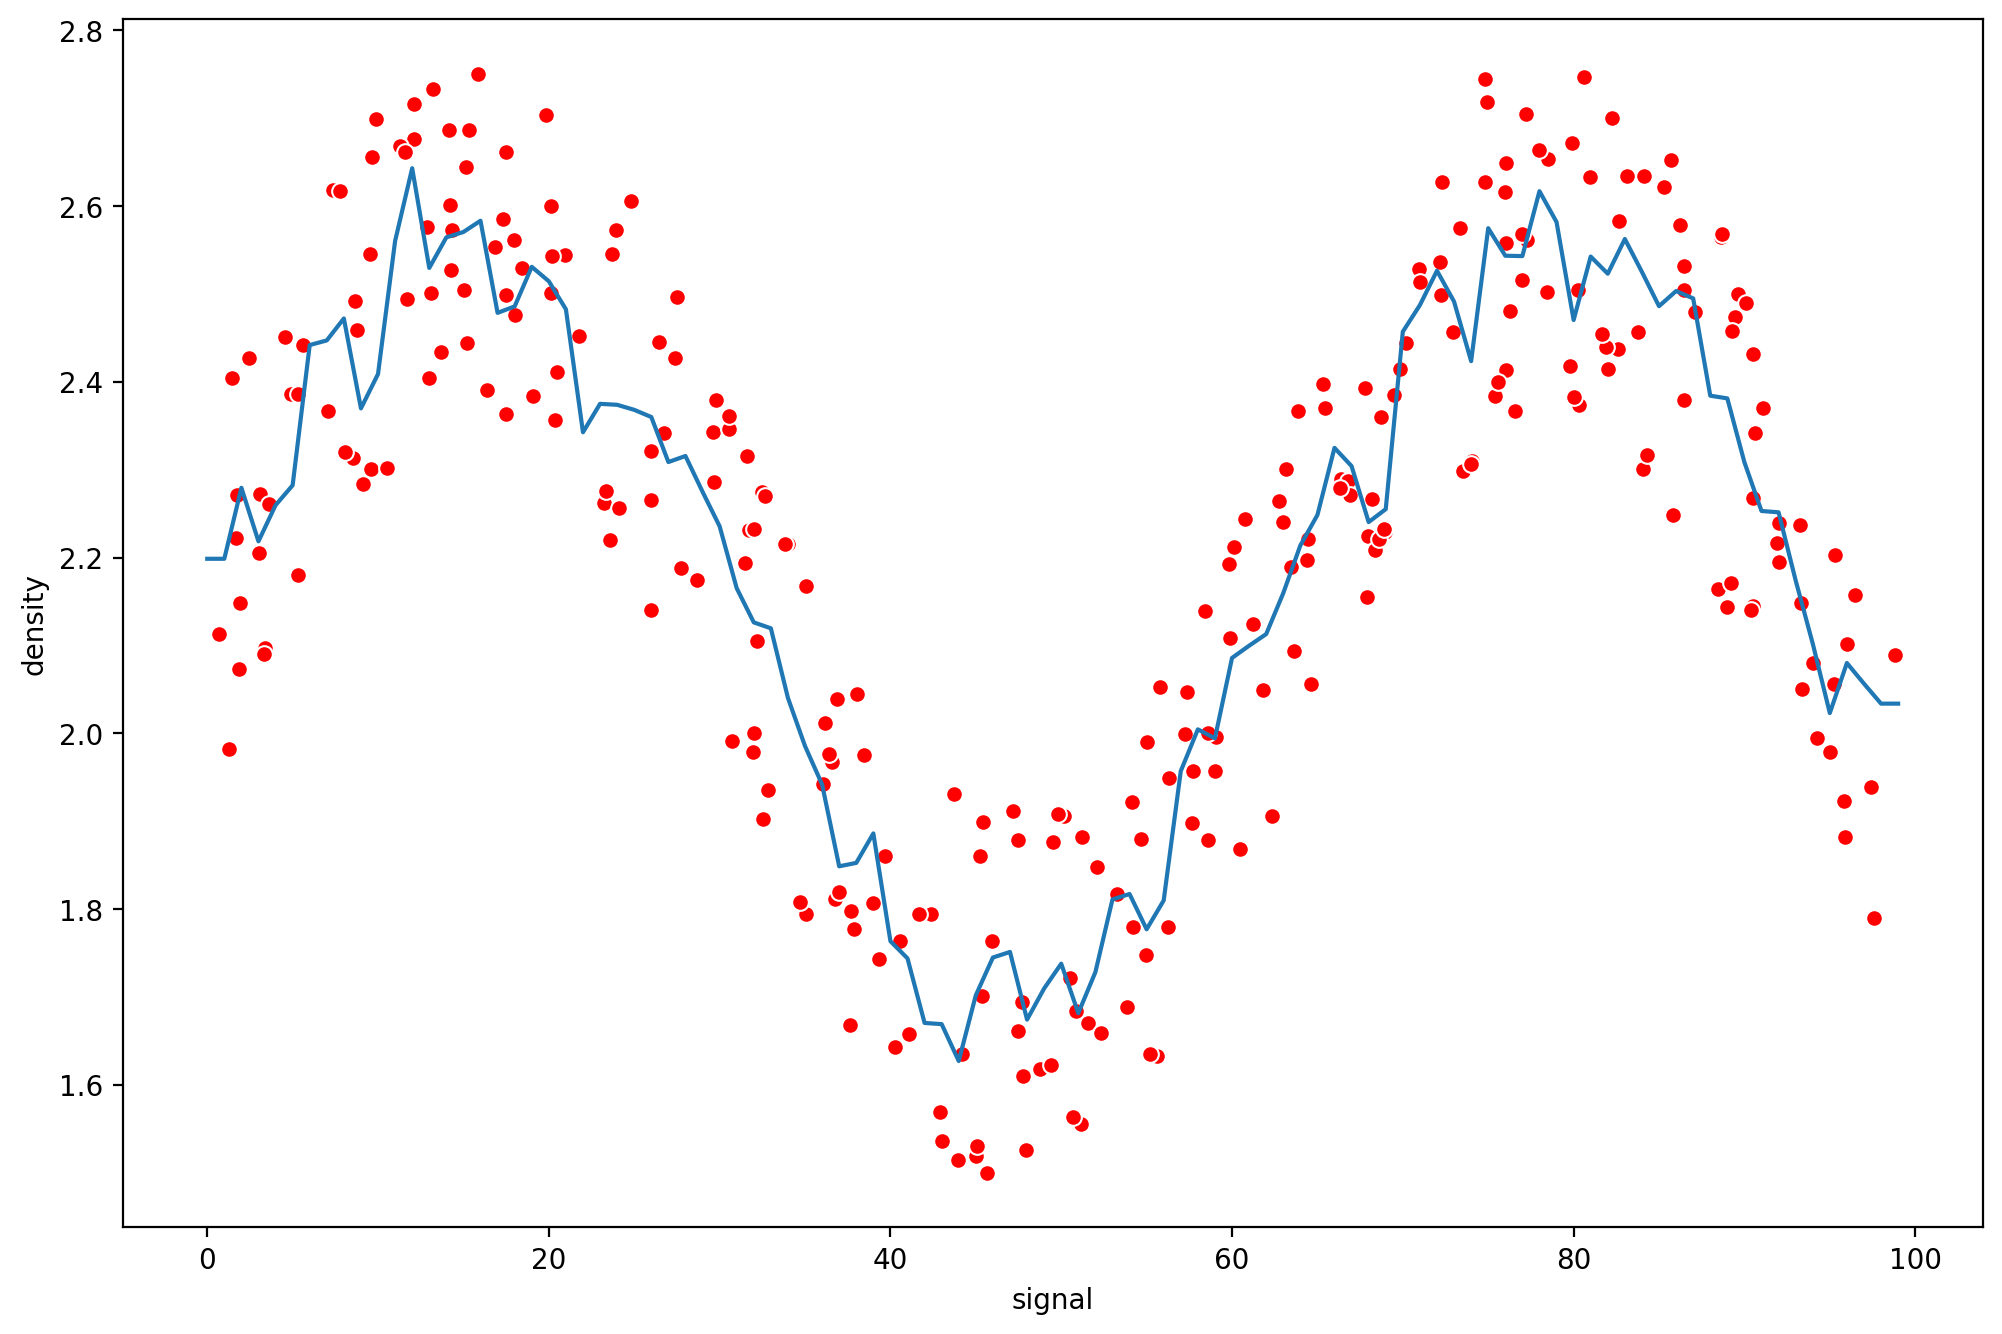

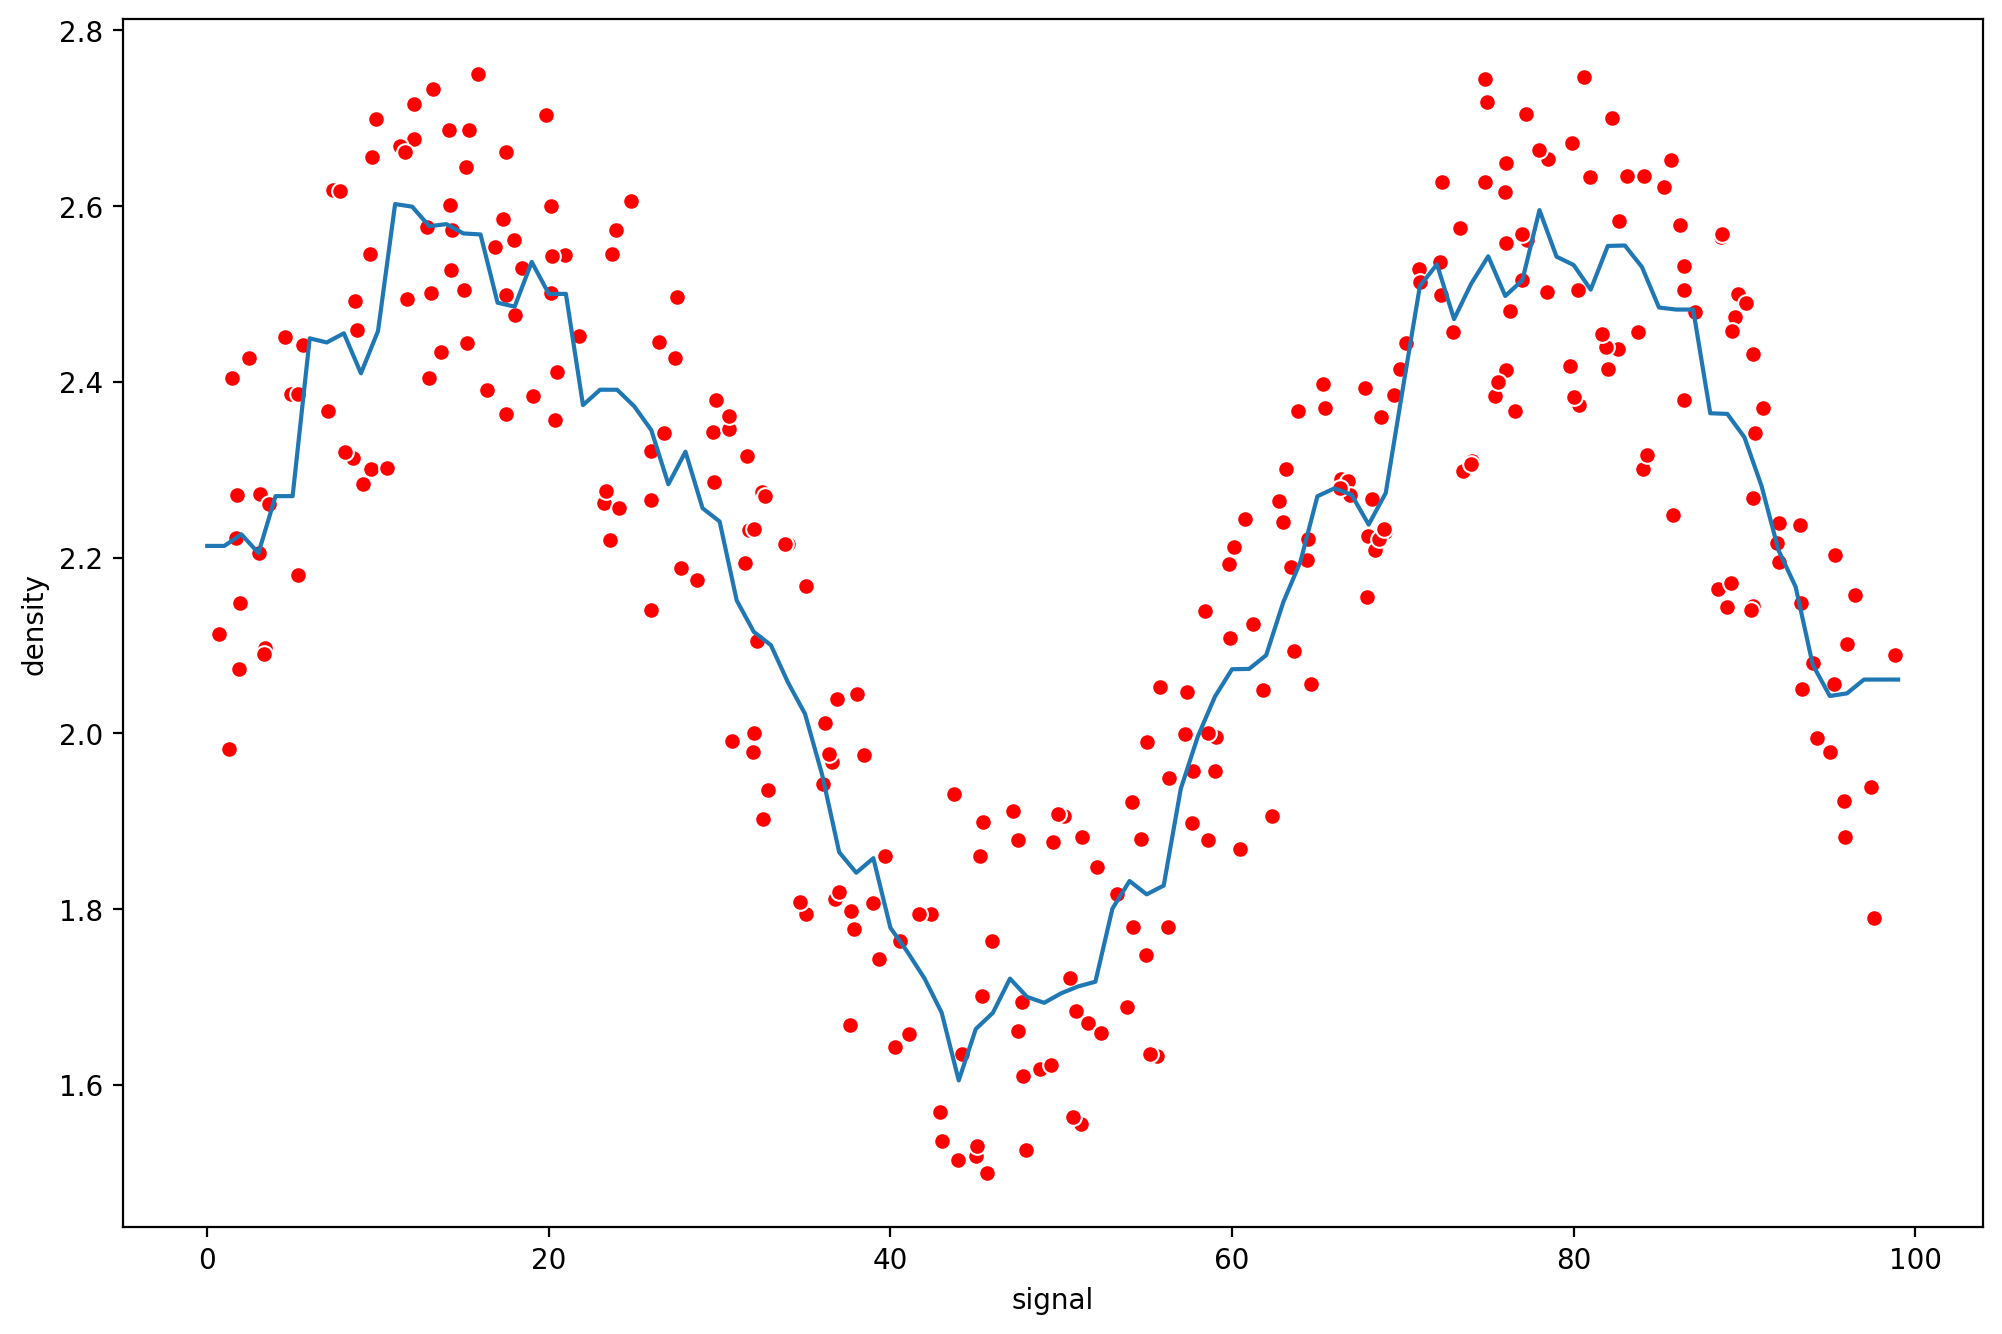

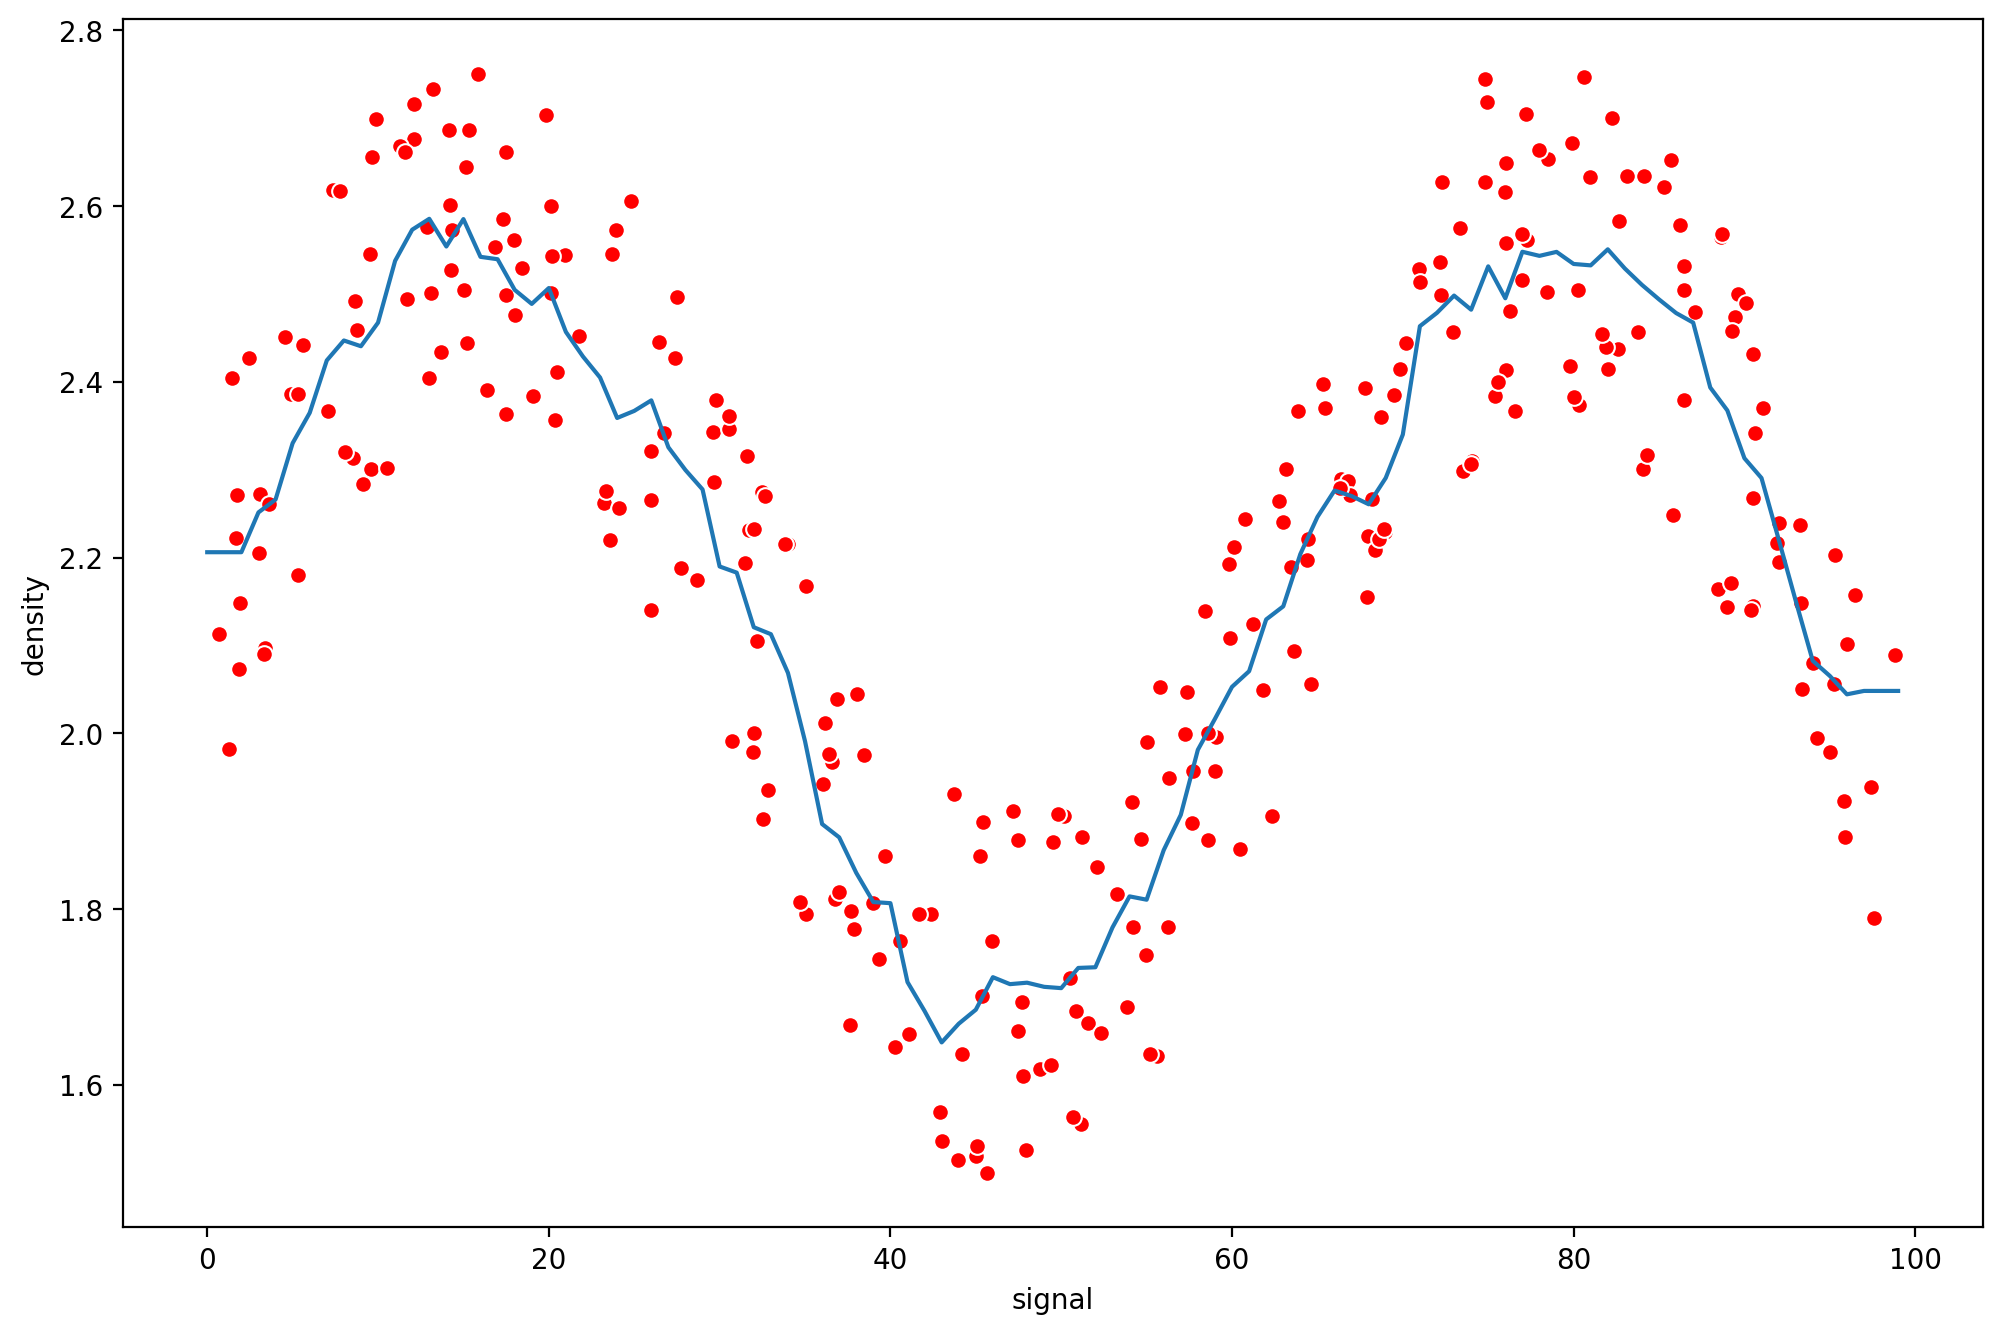

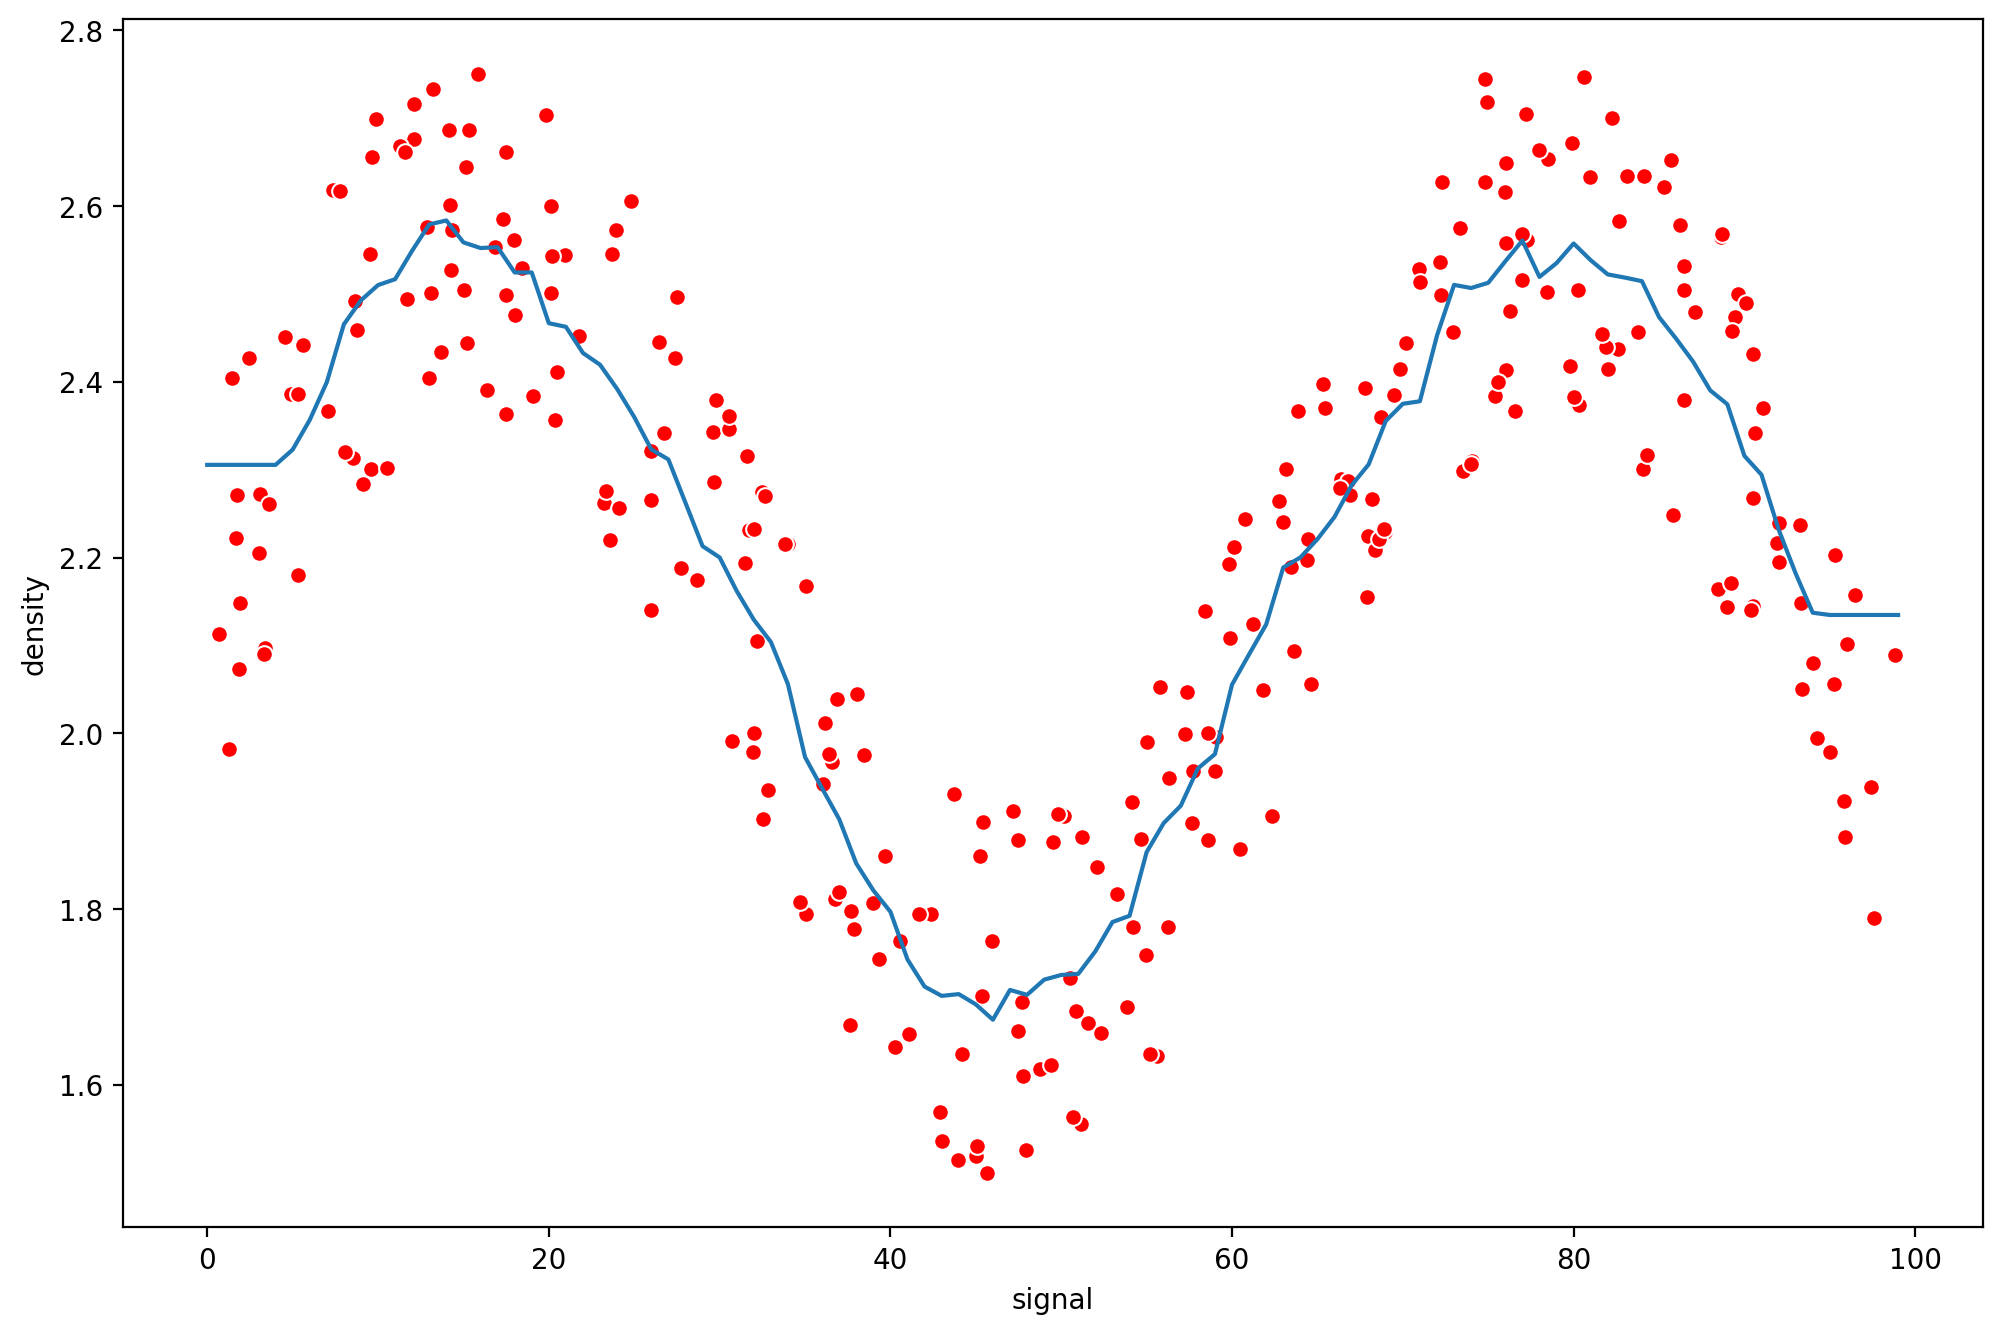

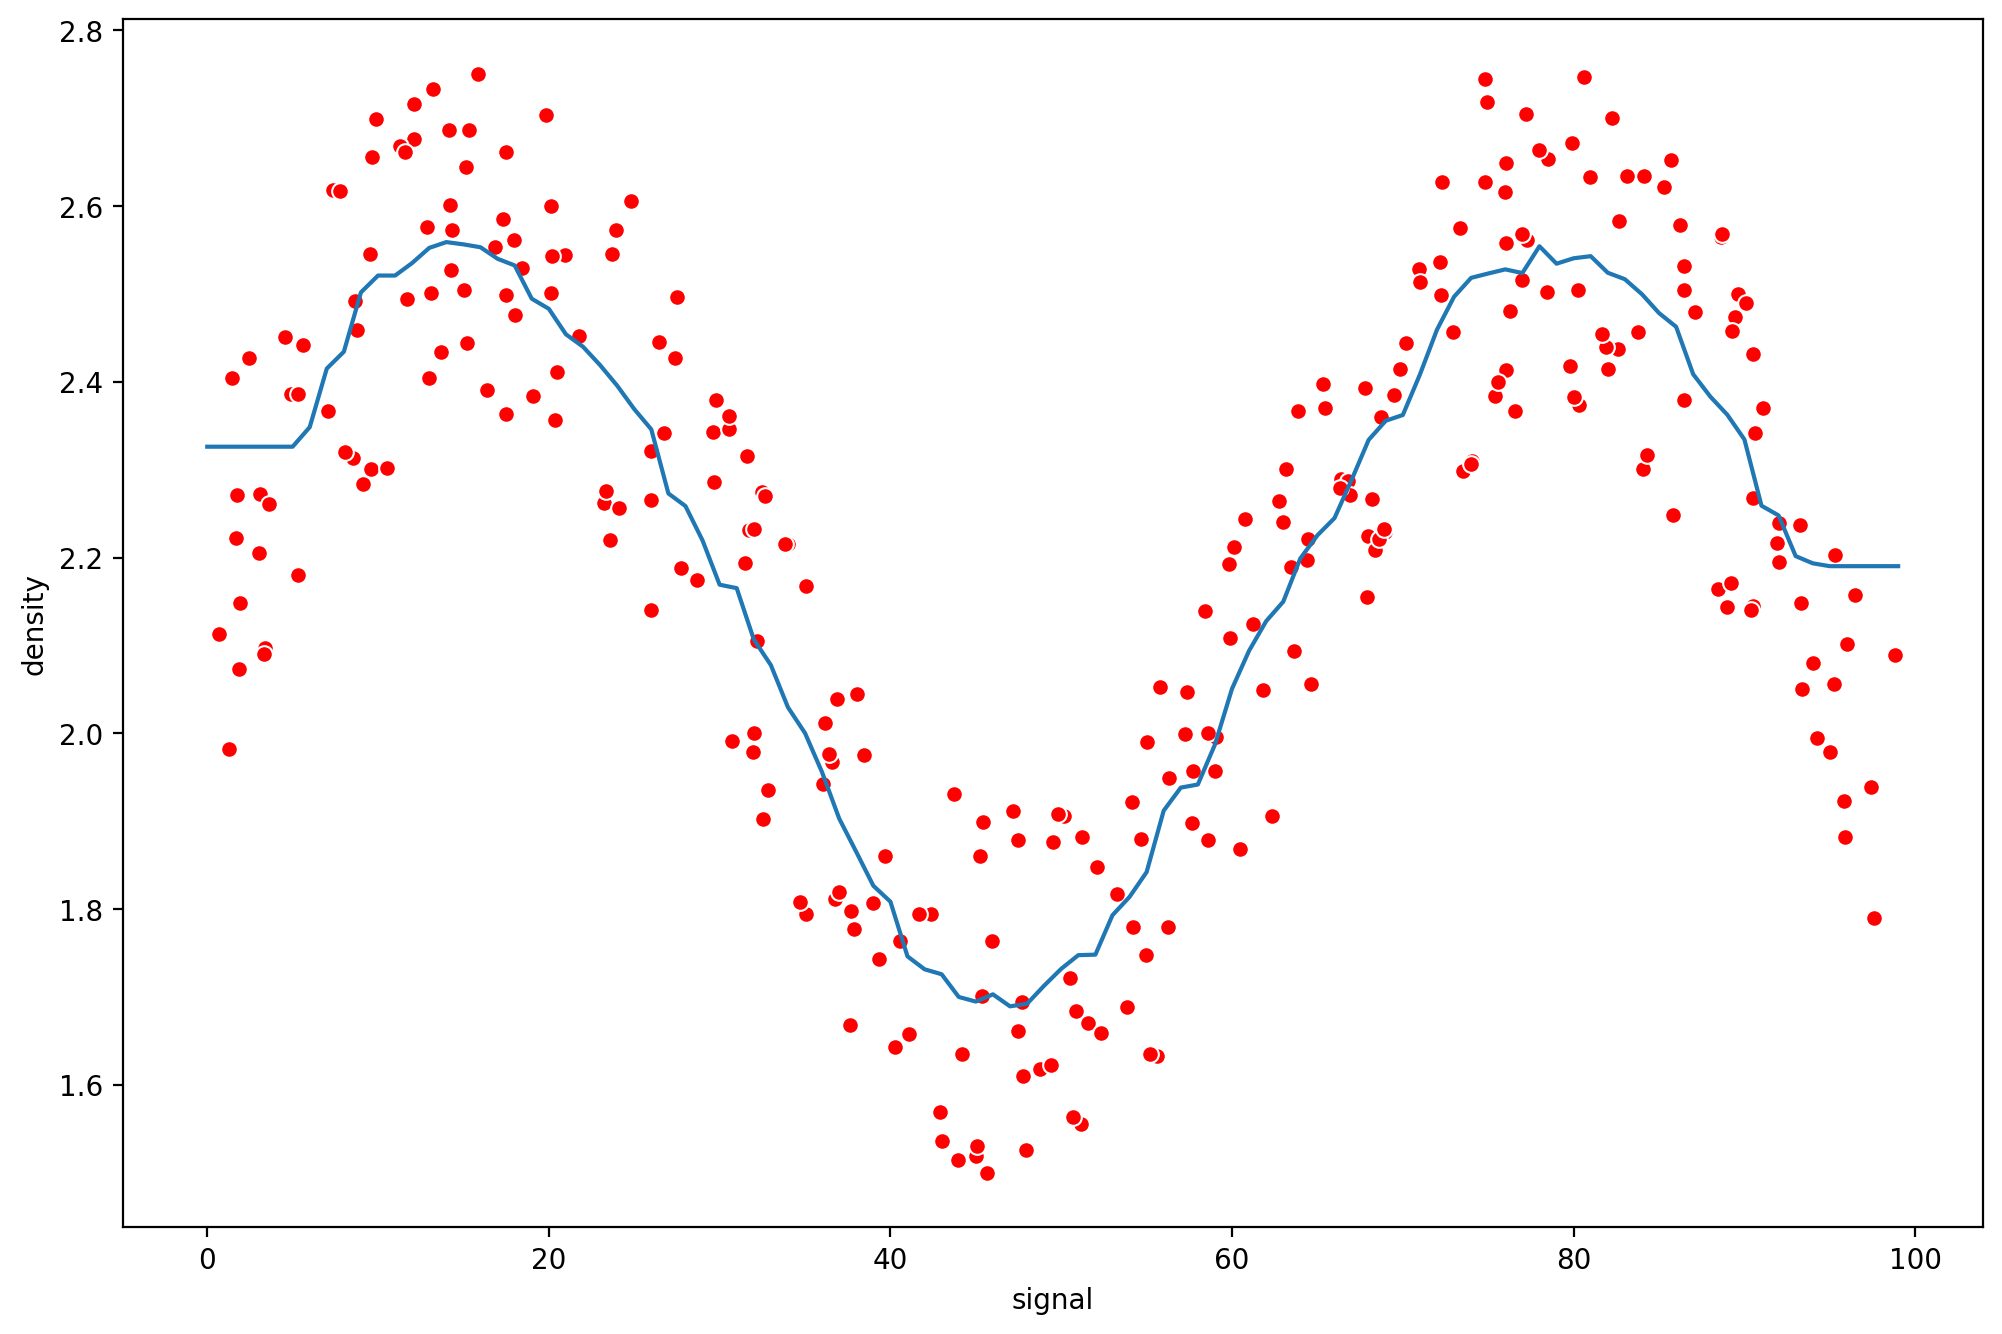

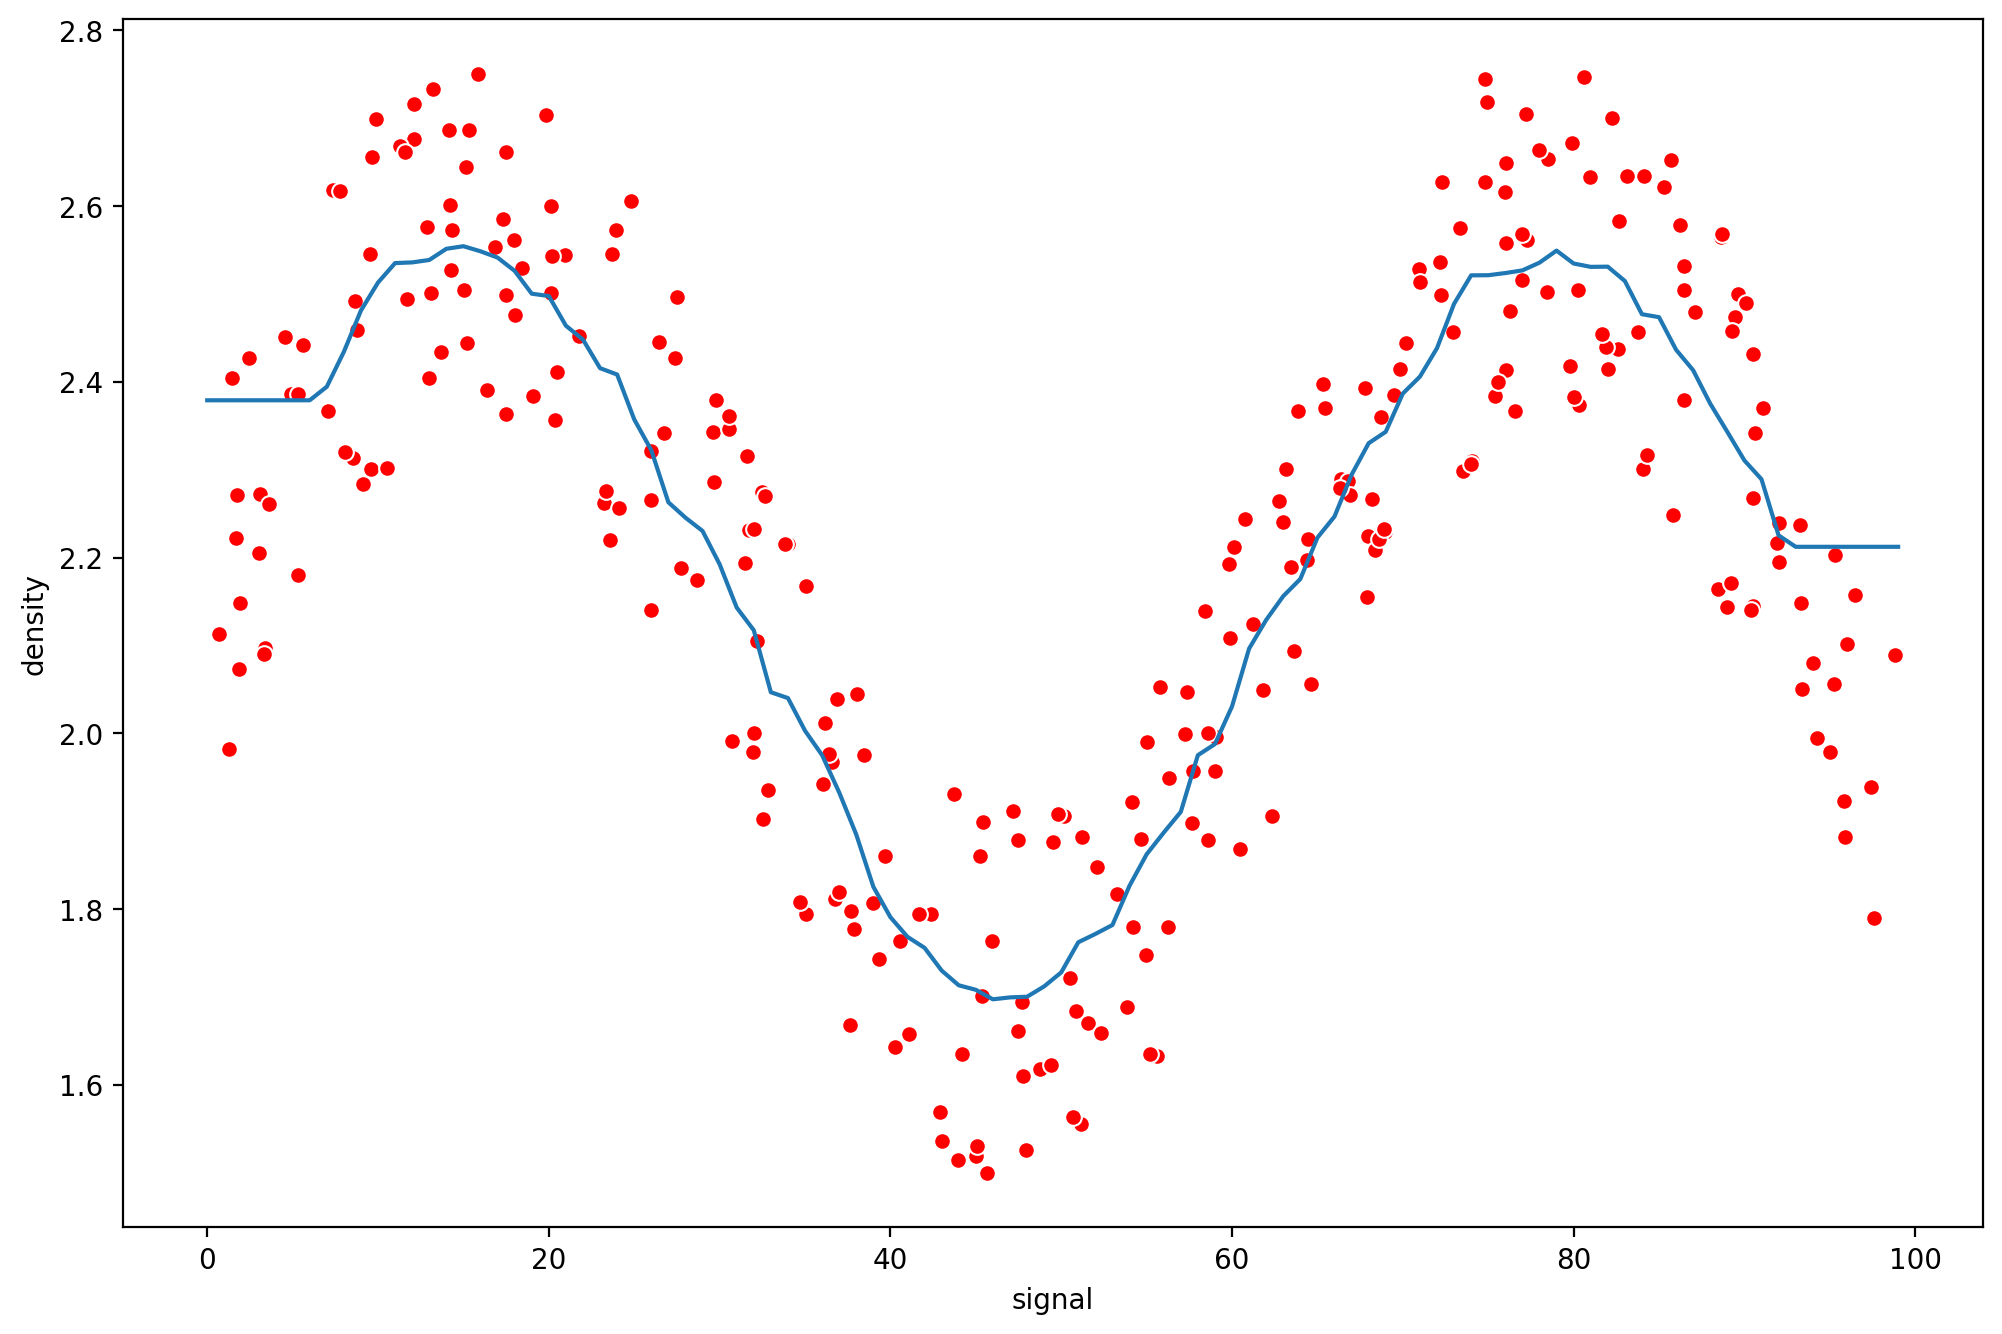

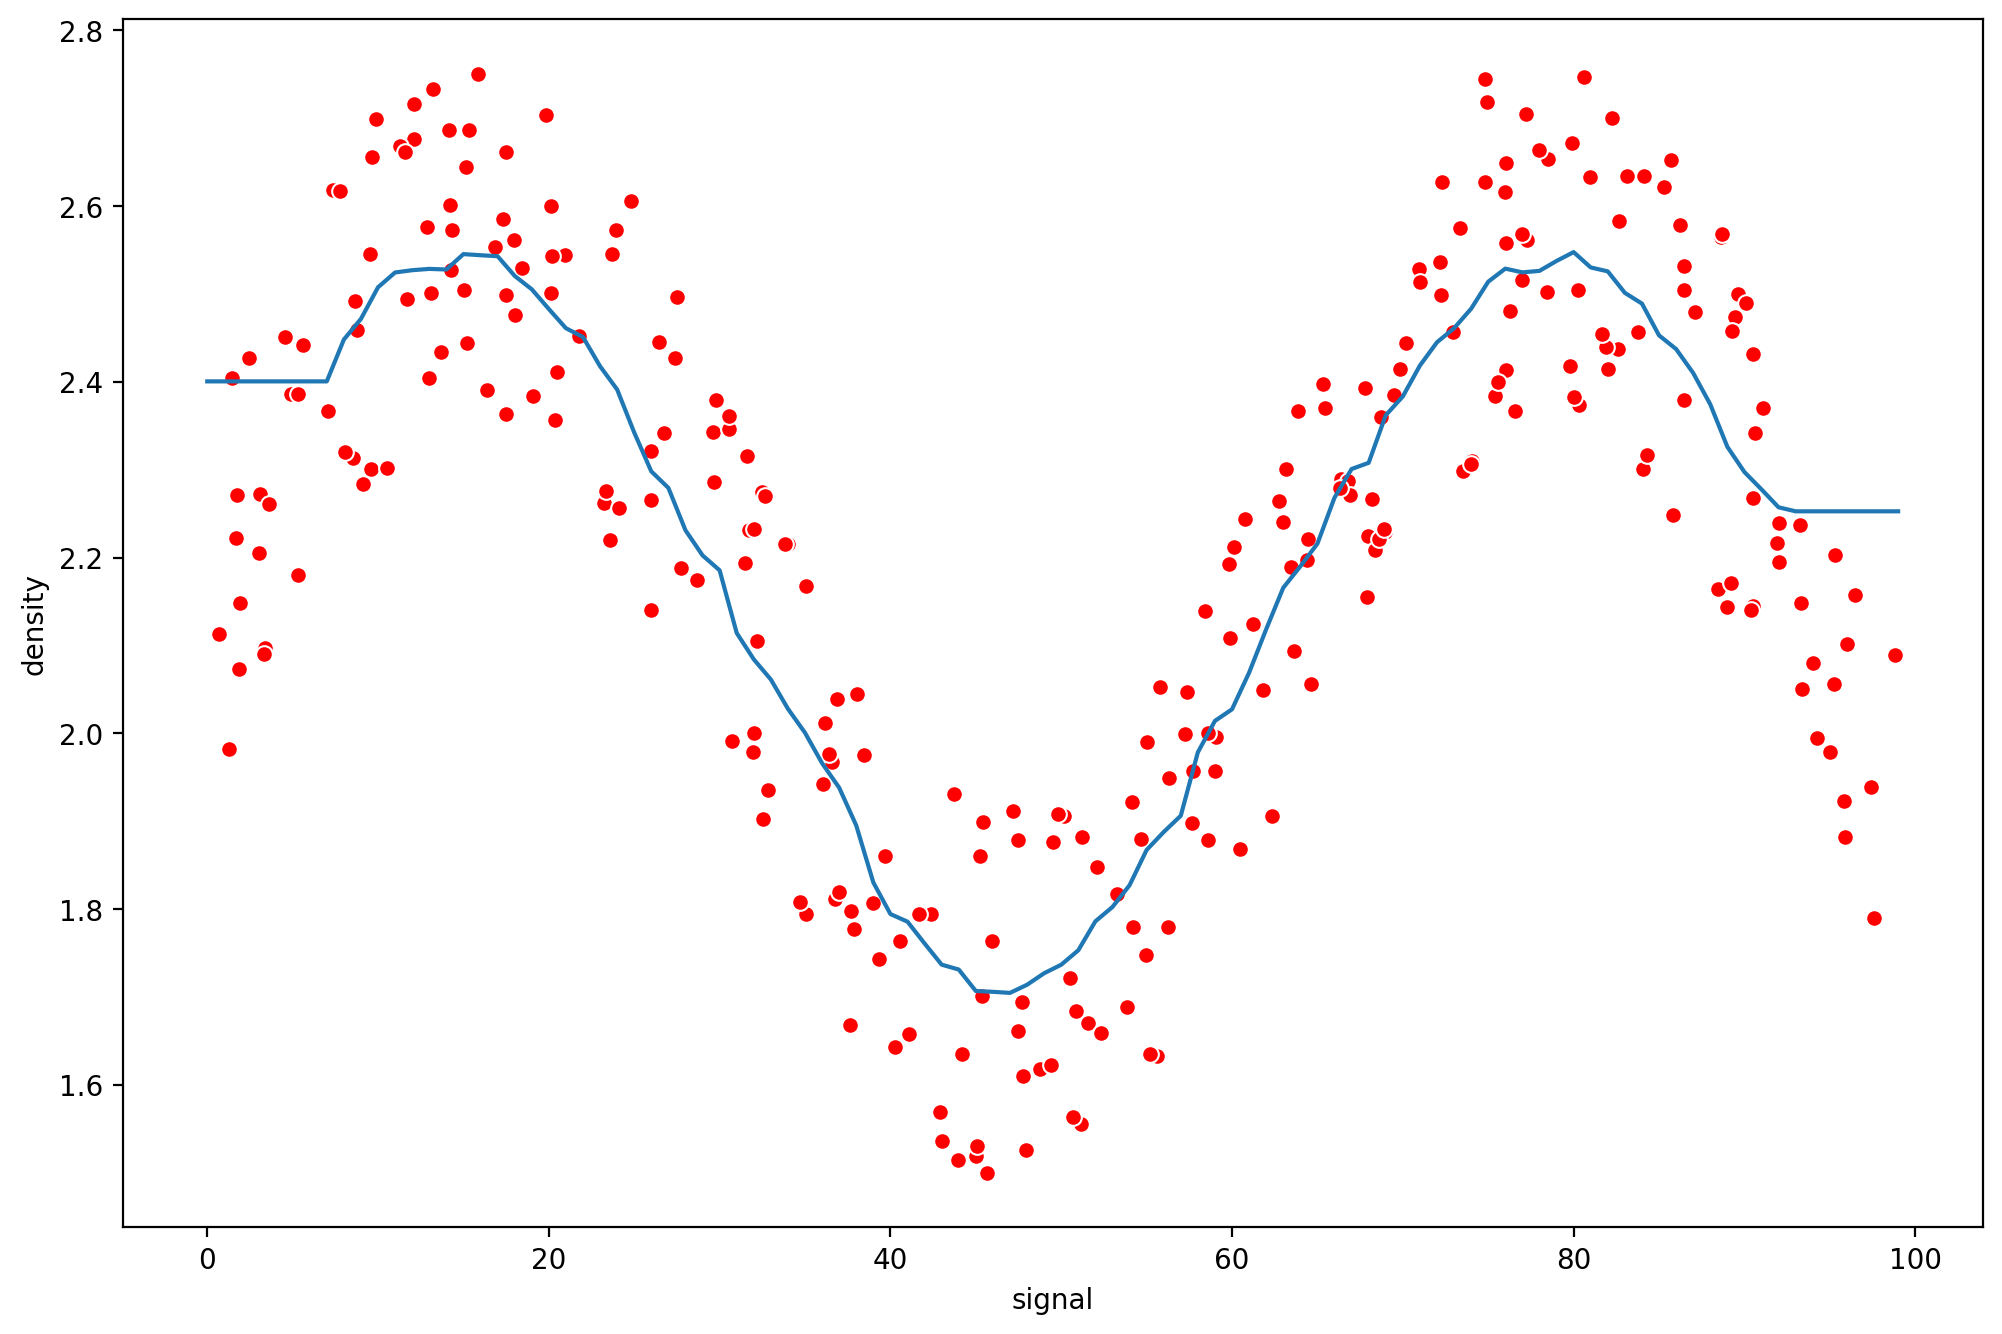

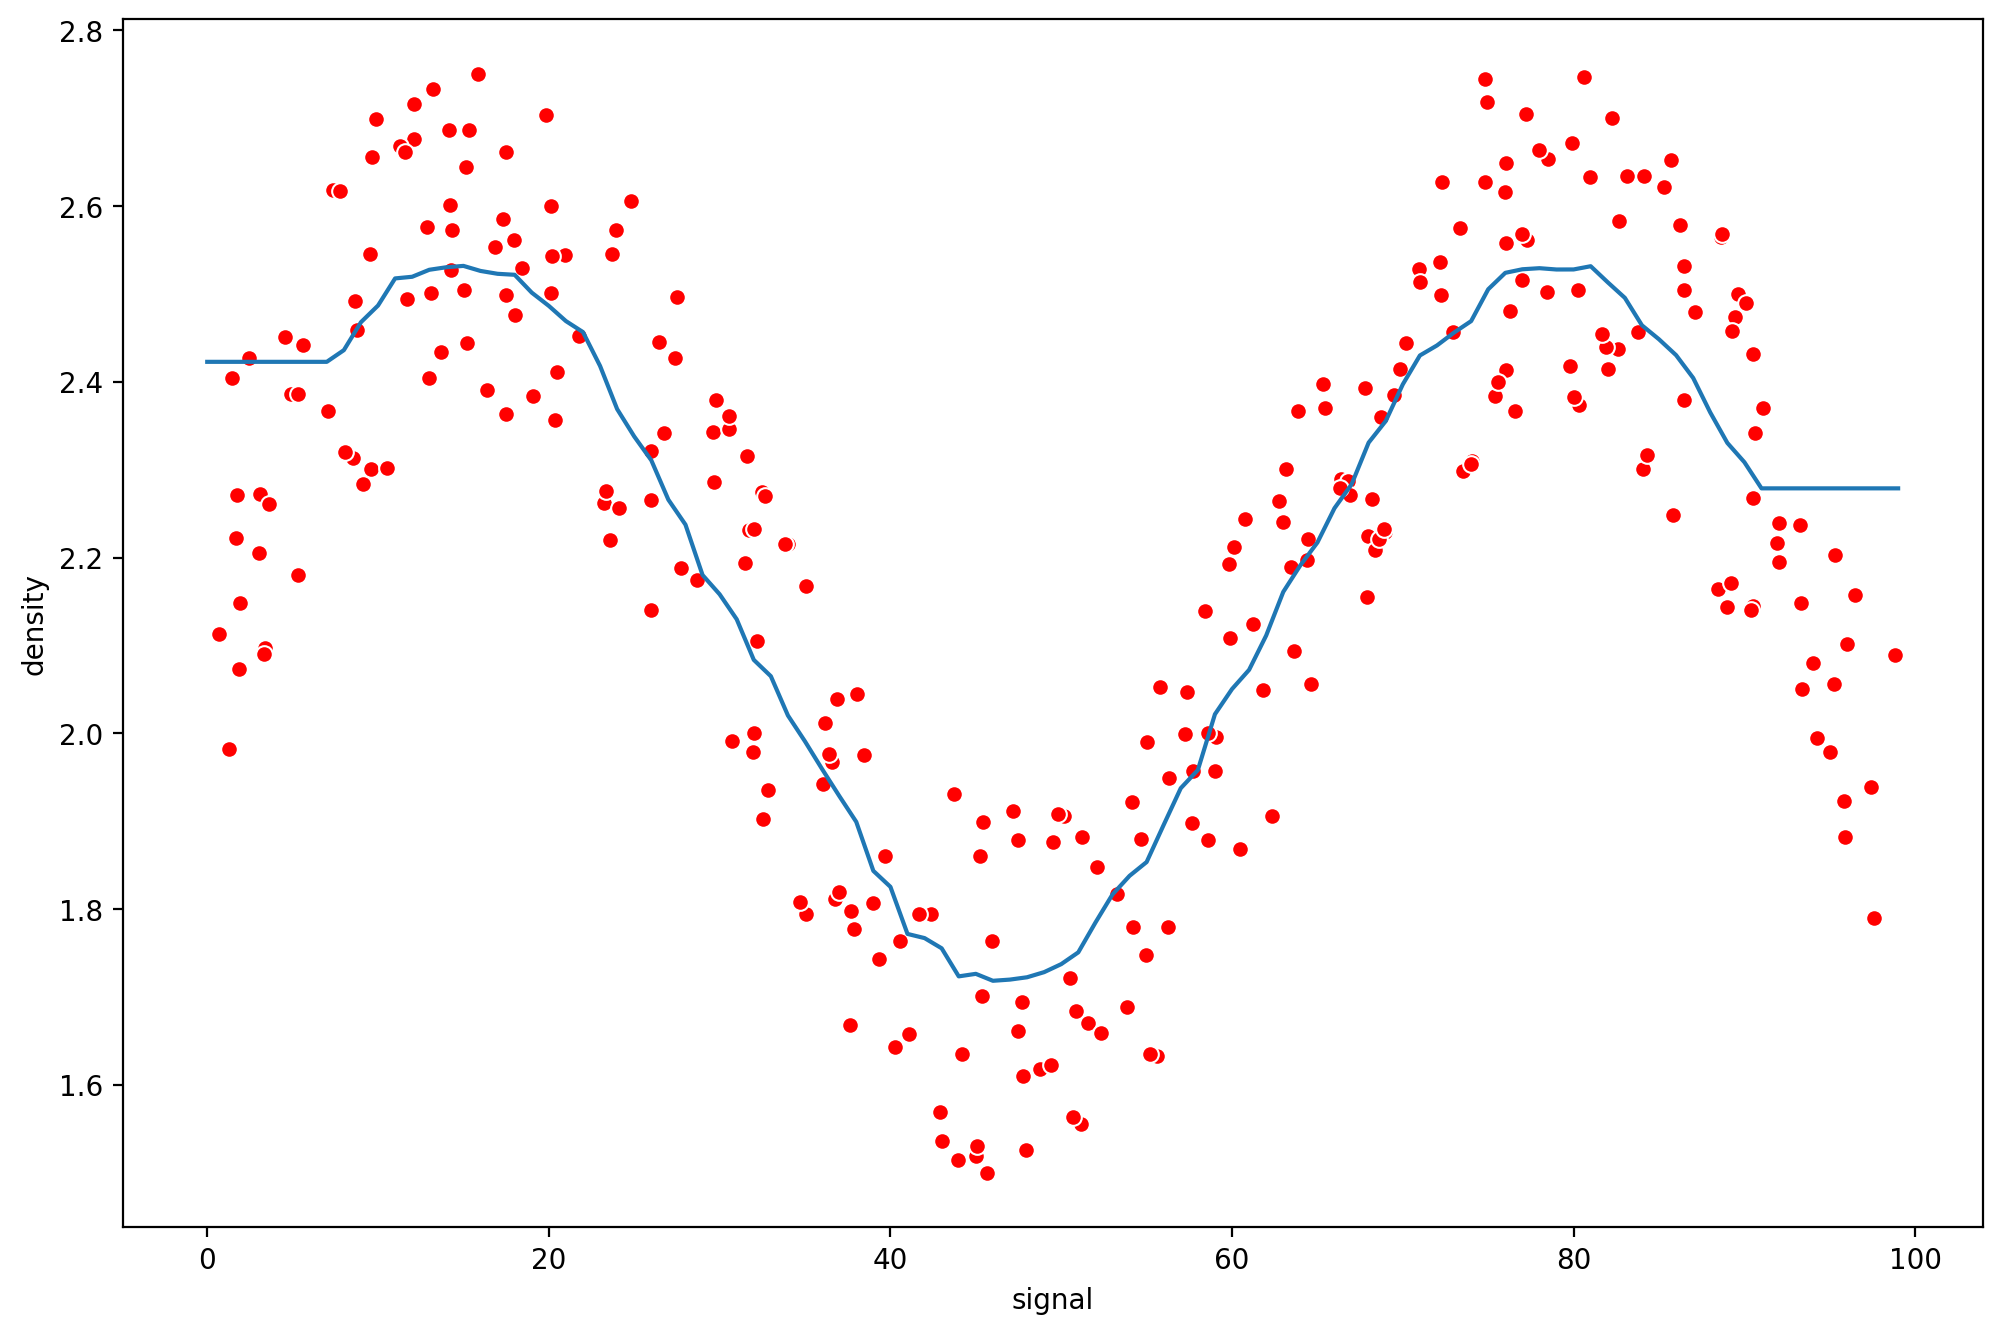

In [46]:
K_Values=[1,3,5,7,10,20,25,30,35,40]

for n in K_Values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [47]:
from sklearn.tree import DecisionTreeRegressor

MAE:0.11877297474442382
RMSE:0.15234870286353372


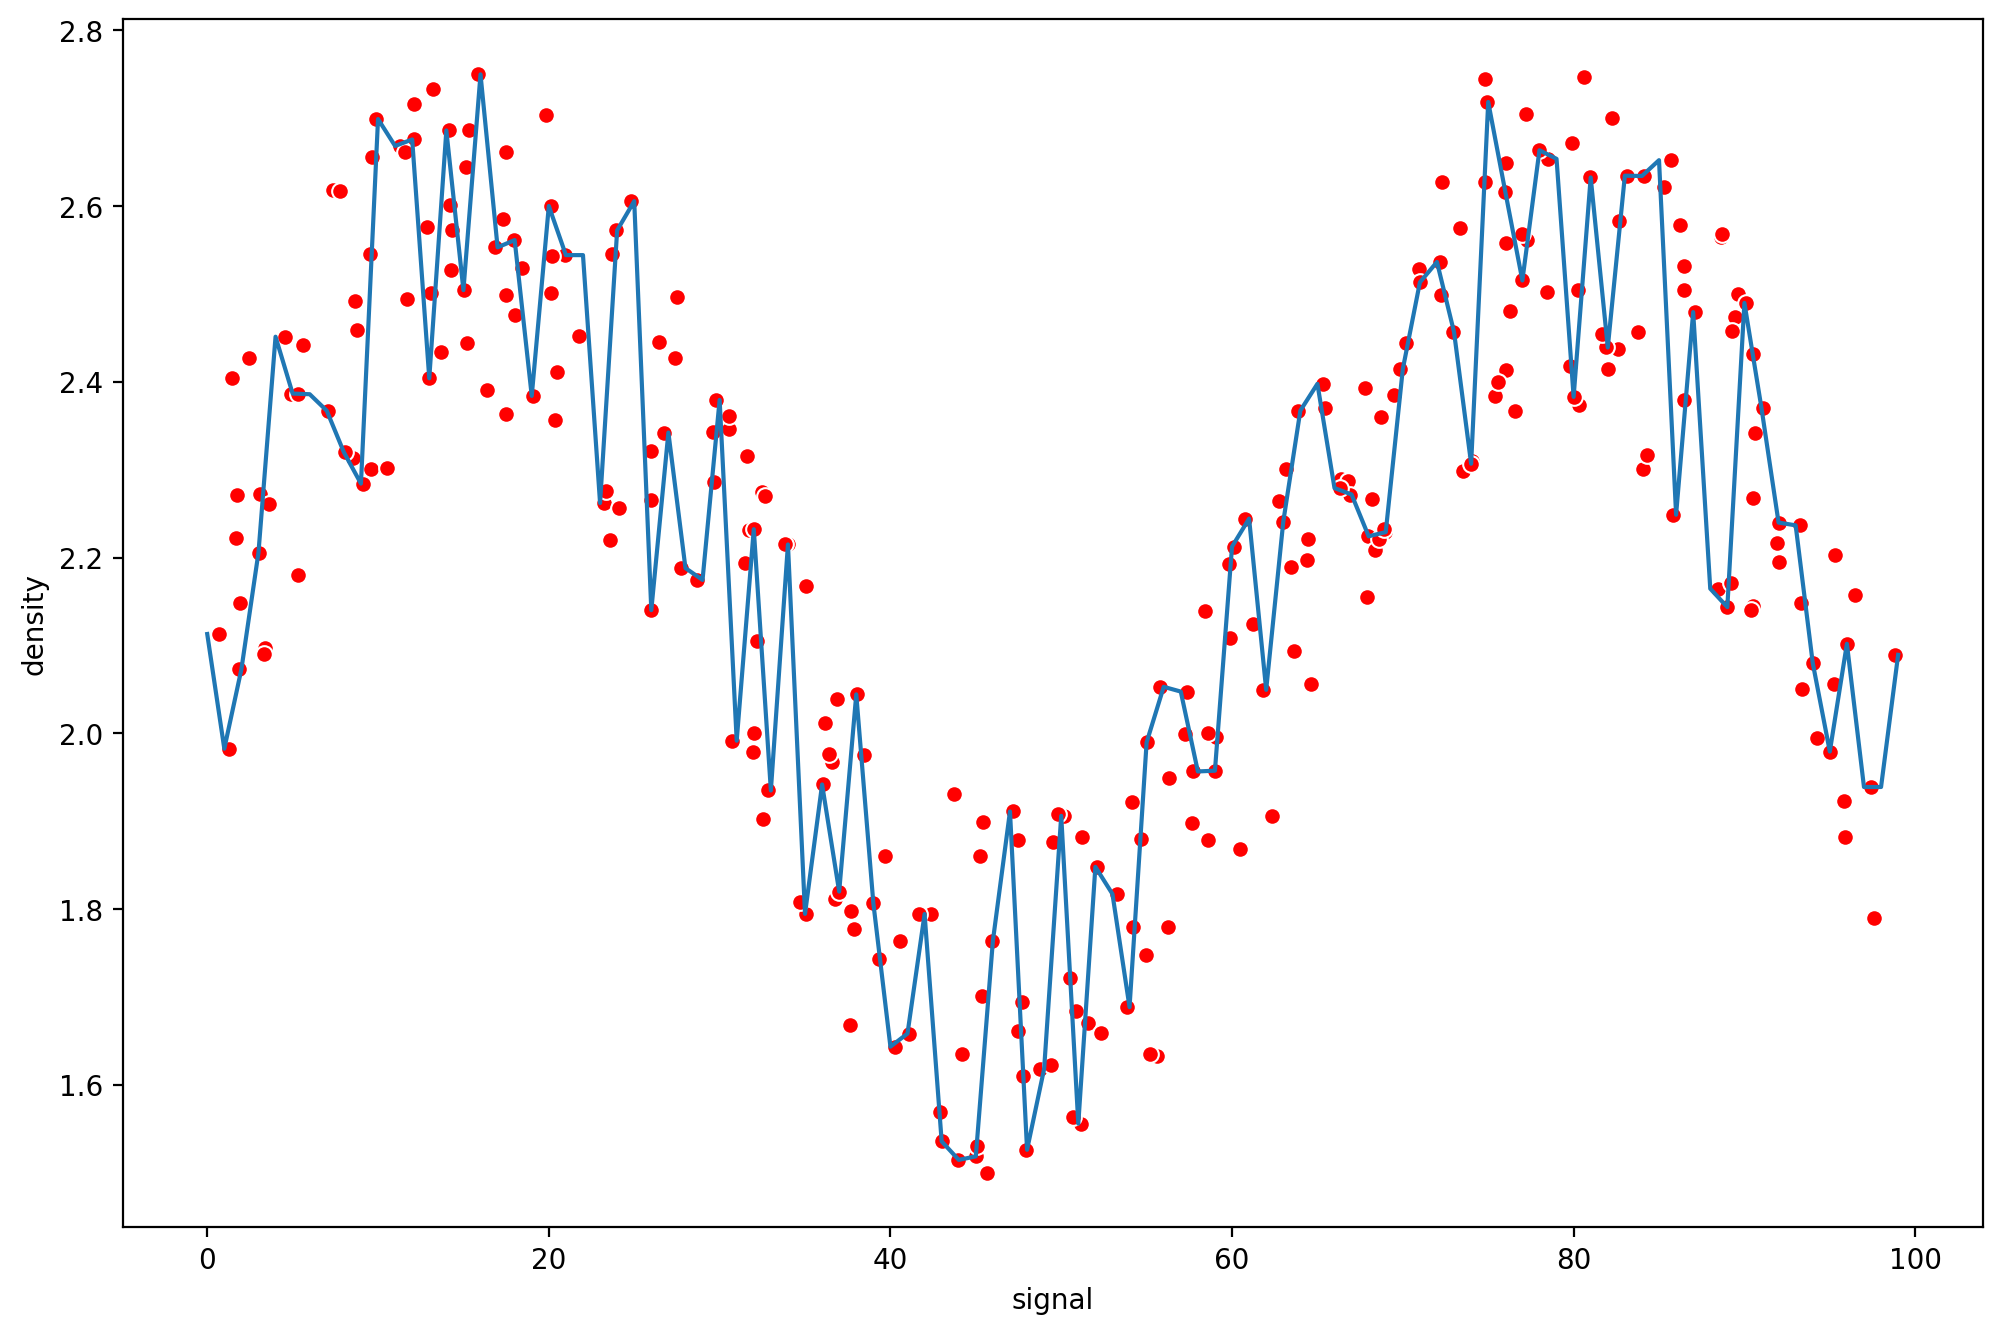

In [48]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [49]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [50]:
svr =SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100],'gamma': ['auto','scale']}
grid = GridSearchCV(svr,param_grid)

MAE:0.11243103141069175
RMSE:0.13015742723602505


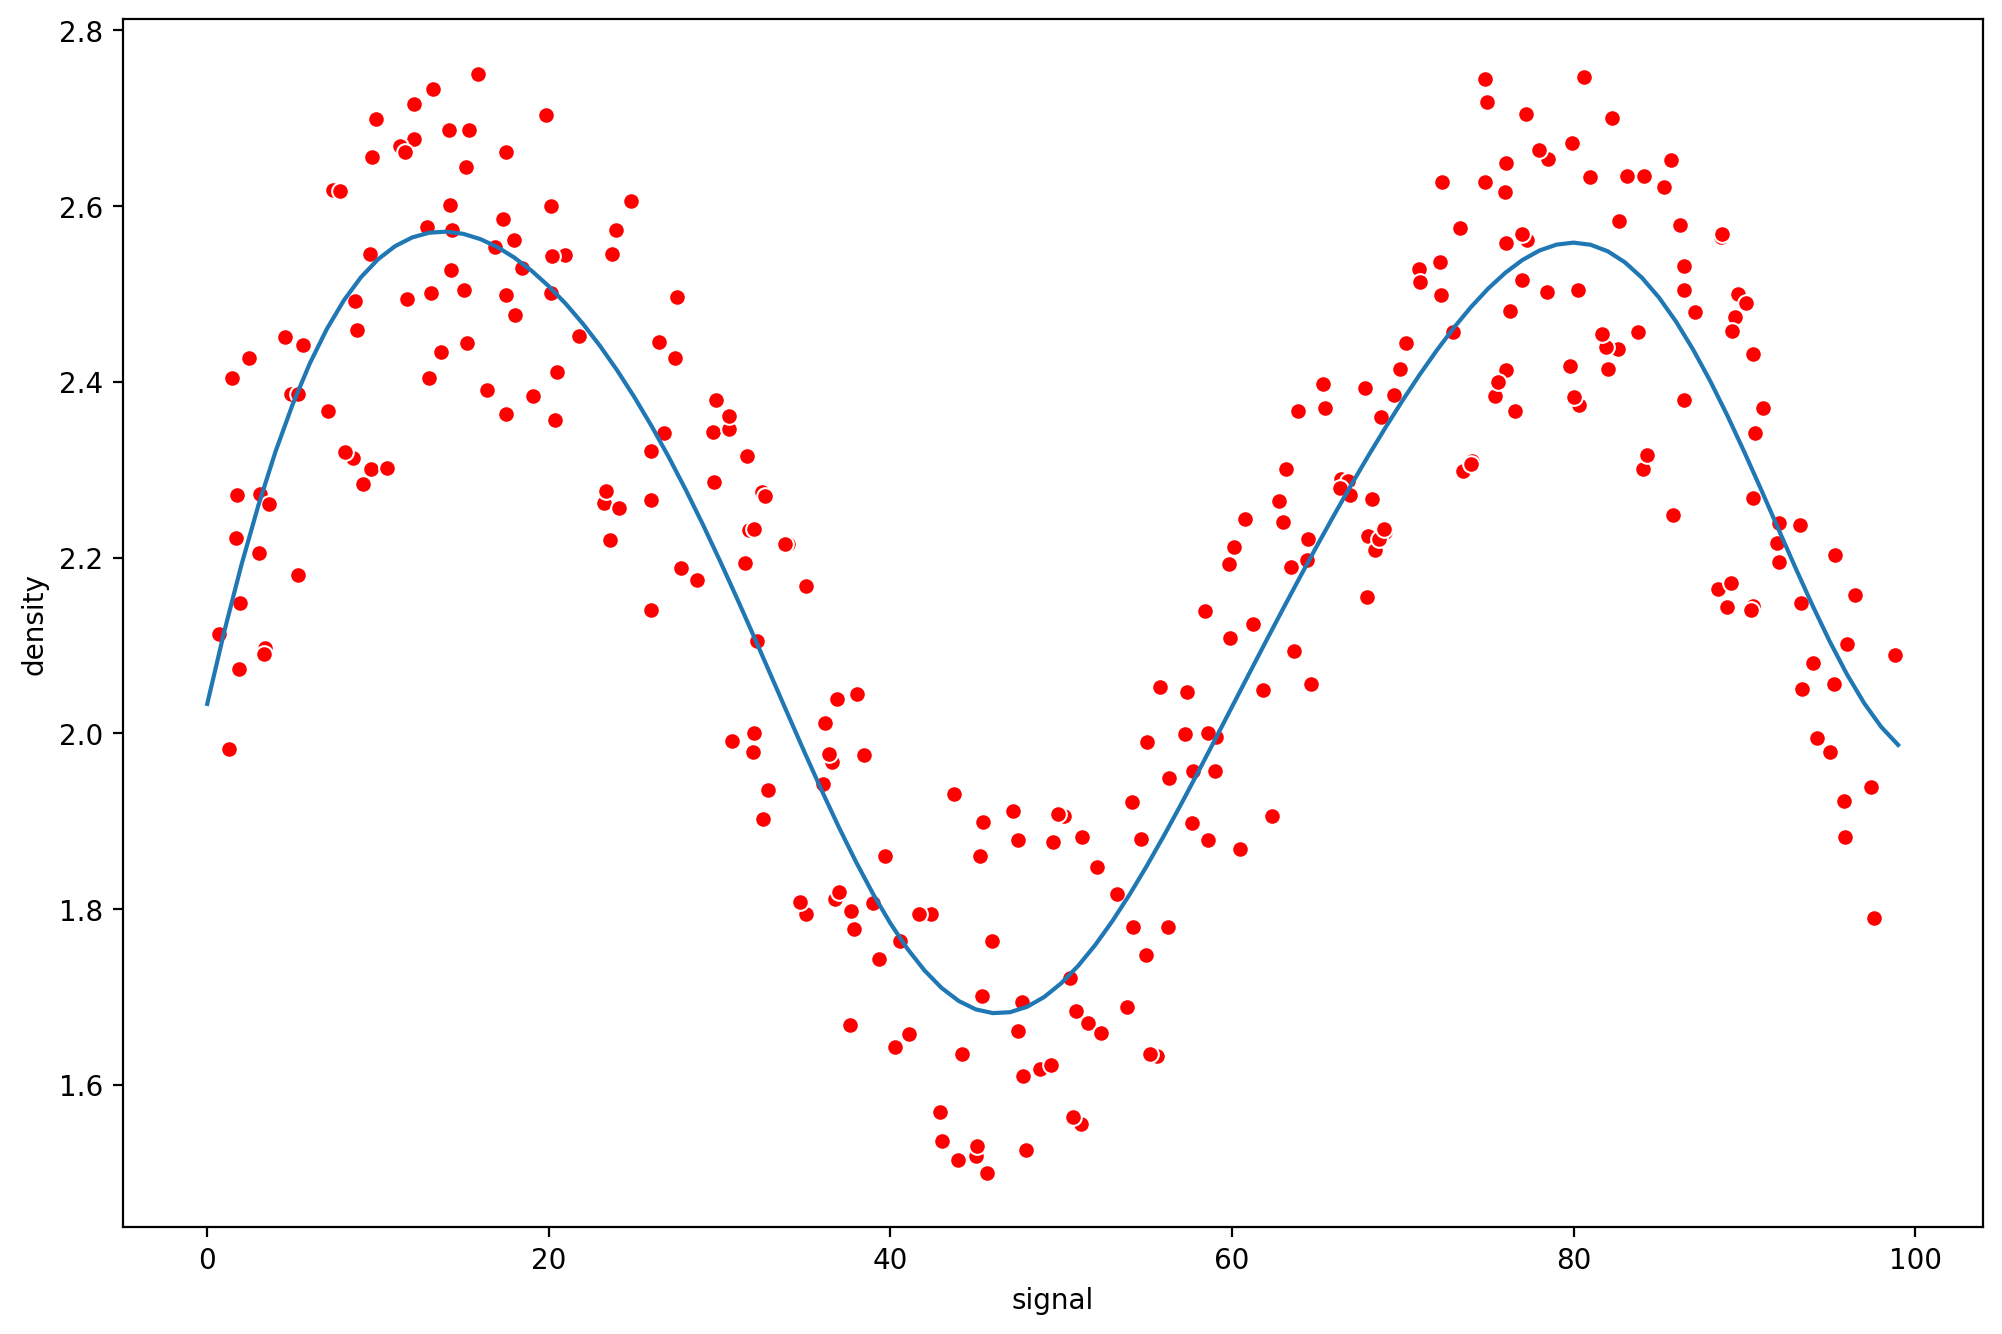

In [51]:
run_model(grid,X_train,y_train,X_test,y_test)

In [52]:
from sklearn.ensemble import RandomForestRegressor

MAE:0.11334172718987778
RMSE:0.13817589252279702


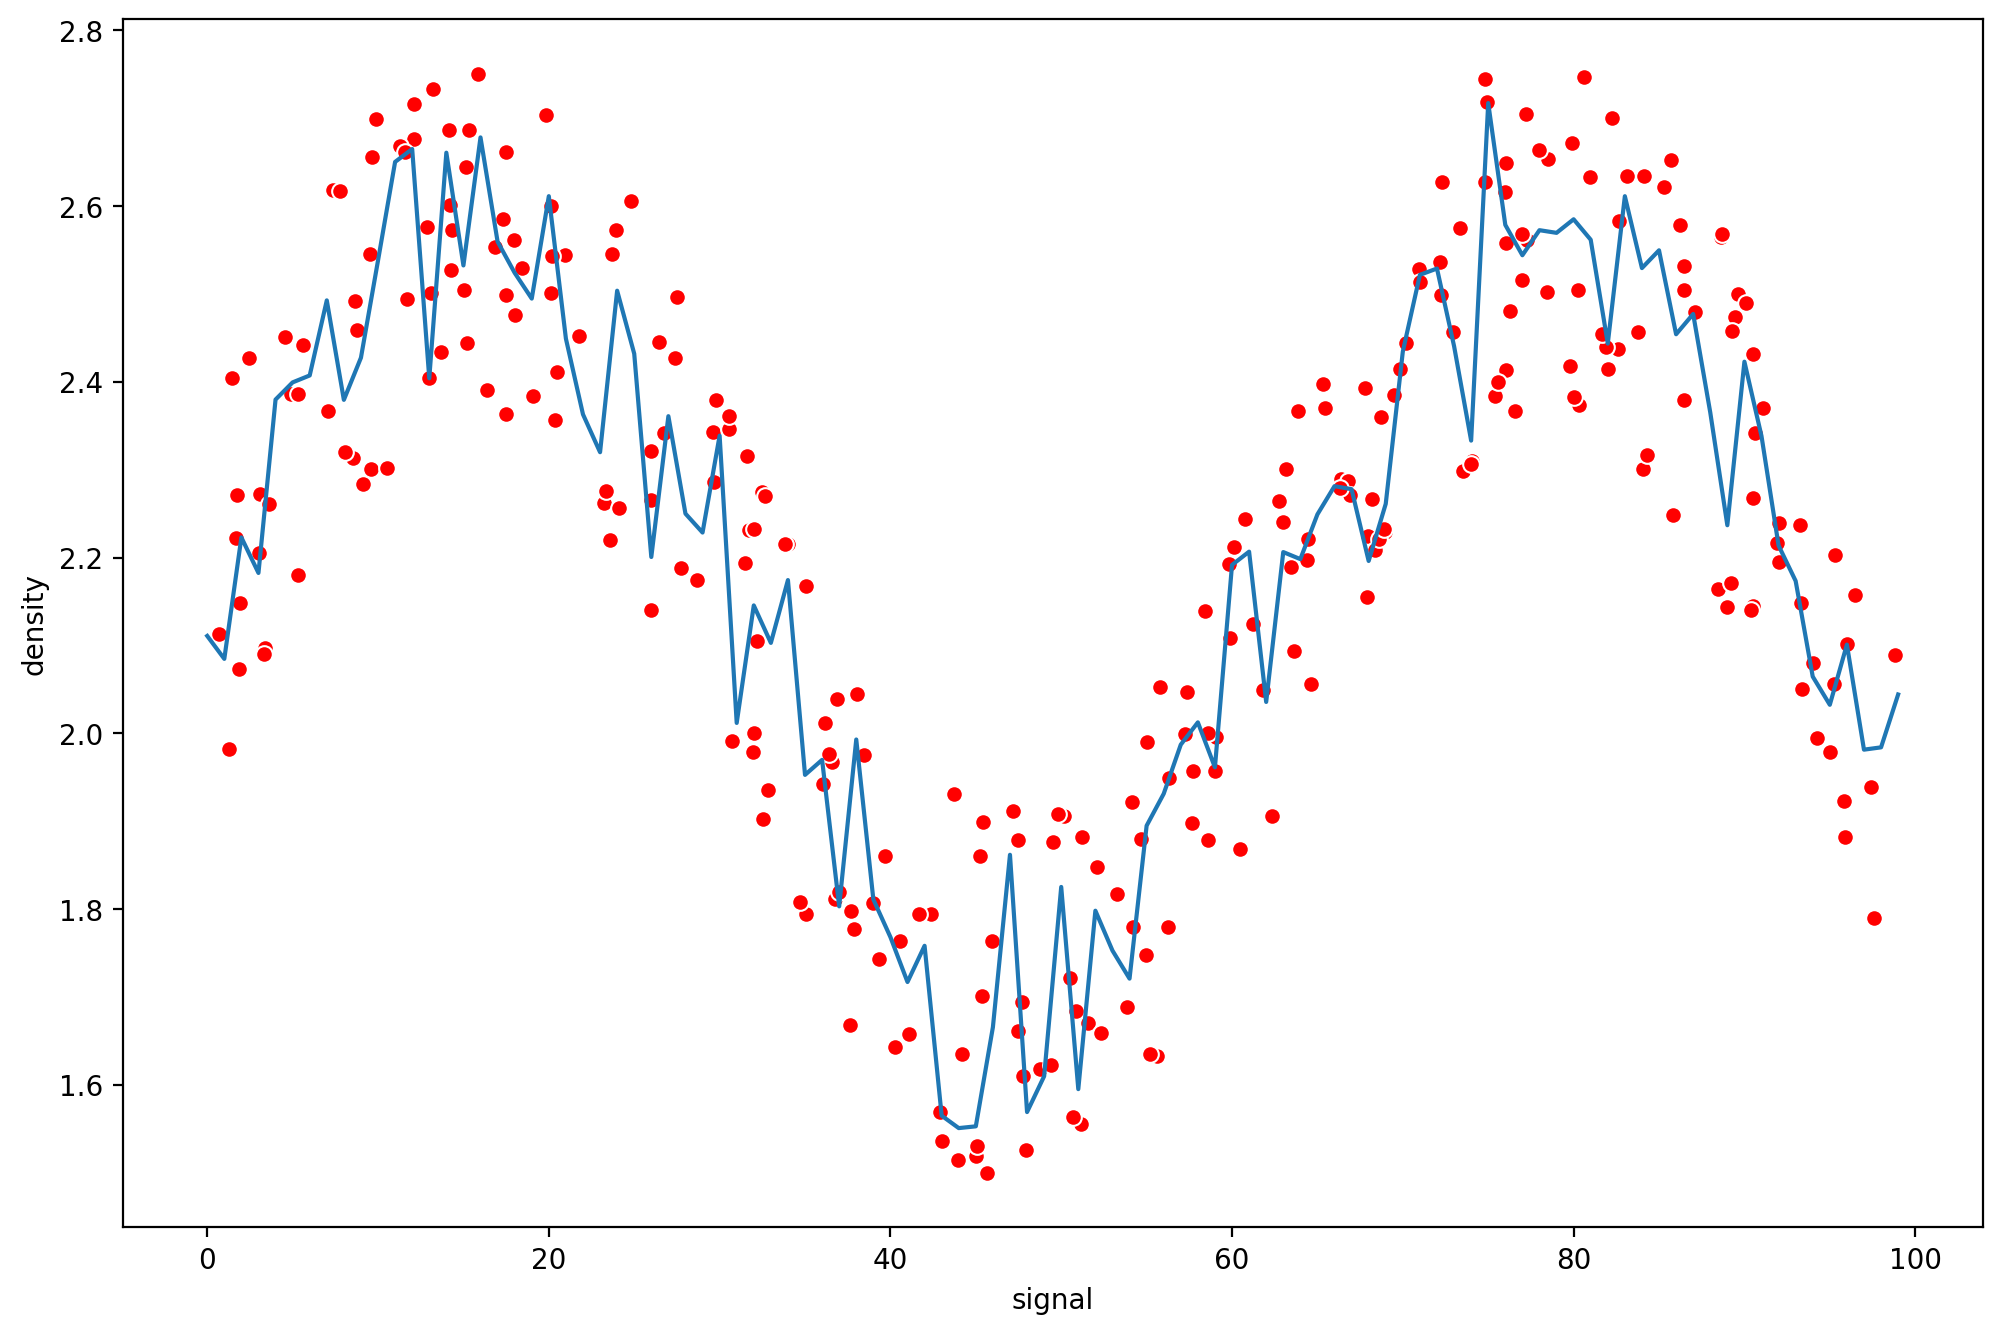

In [53]:
RFR = RandomForestRegressor(n_estimators = 10)
run_model(RFR,X_train,y_train,X_test,y_test)